# Plots for presentation slides (slightly different styles from main ones)

In [2]:
import os

import numpy as np
import scipy as sp
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.gridspec import GridSpec

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

import astropy.constants as const
import astropy.units as u

from astropy.visualization import quantity_support
quantity_support()

from ipywidgets import interact, IntSlider, FloatSlider

import seaborn as sns

In [3]:
%config InlineBackend.figure_format = 'retina'

plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': 0.6*fs,
          'axes.labelsize': 0.8*fs,
          'xtick.labelsize': 0.6 * fs,
          'ytick.labelsize': 0.6 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)

# Load and prep data

In [4]:
from importlib import reload
import sys
sys.path.append("../")

import mesagrid
reload(mesagrid);

sys.path.append("../helpers")
import mpt
reload(mpt);

In [23]:
from types import ModuleType
def refresh_mpt():
    rreload(mpt)
    rreload(mpt)

def rreload(module):
    """Recursively reload modules."""
    reload(module)
    for attribute_name in dir(module):
        attribute = getattr(module, attribute_name)
        if type(attribute) is ModuleType:
            if attribute_name in ["hr", "profiles", "period_spacing", "utils"]:
                rreload(attribute)

In [5]:
tracks = {}
for folder, label in zip(["4_3_5_mdm100", "4_3_5_mdm50", "4_3_5_mdm10", "4_3_5_mdm1"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}, D_{\rm min} = 100 \, {\rm cm^2 \, s^{-1}}$",
                          r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}, D_{\rm min} = 50 \, {\rm cm^2 \, s^{-1}}$",
                          r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}, D_{\rm min} = 10 \, {\rm cm^2 \, s^{-1}}$",
                          r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}, D_{\rm min} = 1 \, {\rm cm^2 \, s^{-1}}$"]):
    path = os.path.join("../output/cluster/binaries", folder)
    tracks[folder] = [mesagrid.Track(path, dir_name="LOGS_star1", parameters=f"{label} (Donor)"),
                     mesagrid.Track(path, dir_name="LOGS_star2", parameters=f"{label} (Accretor)")]

In [6]:
for folder, label in zip(["D_20"],
                         [r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}, D_{\rm min} = 20 \, {\rm cm^2 \, s^{-1}}$"]):
    path = os.path.join("../output/cluster/binaries/Dmix_grid", folder)
    tracks[folder] = [mesagrid.Track(path, dir_name="LOGS_star1", parameters=f"{label} (Donor)"),
                     mesagrid.Track(path, dir_name="LOGS_star2", parameters=f"{label} (Accretor)")]

In [7]:
single_tracks = {}
Ms = np.arange(3.0, 6.1, 0.1)
for M in Ms:
    folder = f"M_{M:1.1f}"
    single_tracks[folder] = mesagrid.Track(dir=f"../output/cluster/singles_grid/{folder}", parameters=folder)

In [8]:
single_tracks_mdm20 = {}
Ms = np.arange(3.0, 6.1, 0.1)
for M in Ms:
    folder = f"M_{M:1.1f}"
    single_tracks_mdm20[folder] = mesagrid.Track(dir=f"../output/cluster/singles_grid_mdm20/{folder}", parameters=folder)

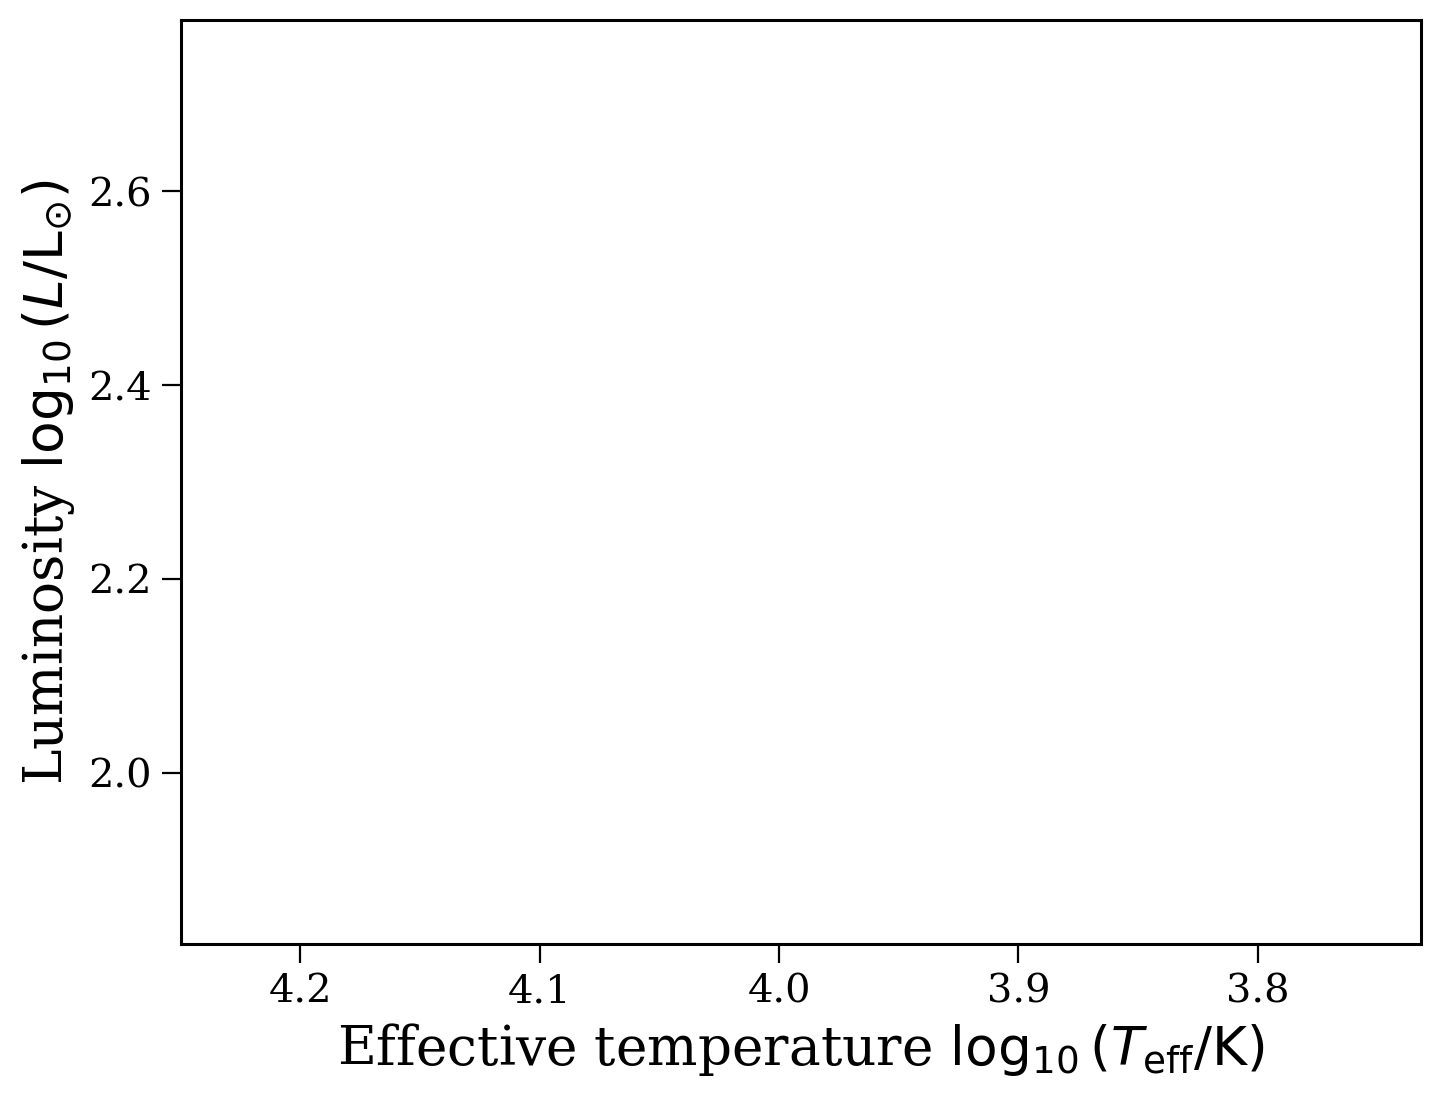

In [13]:
for folder, label in zip(["4_3_5_mdm100"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$"]):
    t1, t2 = tracks[folder]

    fig, ax = None, None
    for track, cmap in zip(tracks[folder], ["viridis", "viridis"]):
        fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=0, cmap=cmap,
                                cbar_var=None, plot_line=False)
        fig, ax = mpt.add_singles_tracks(fig, ax, tracks=single_tracks_mdm20, Ms=np.arange(3.0, 4.1, 0.1), colour="white")
    ax.set_xlim(left=4.25)

    plt.savefig("presentation_plots/hrd_blank.png", format="png", bbox_inches="tight", dpi=300)
    plt.show()

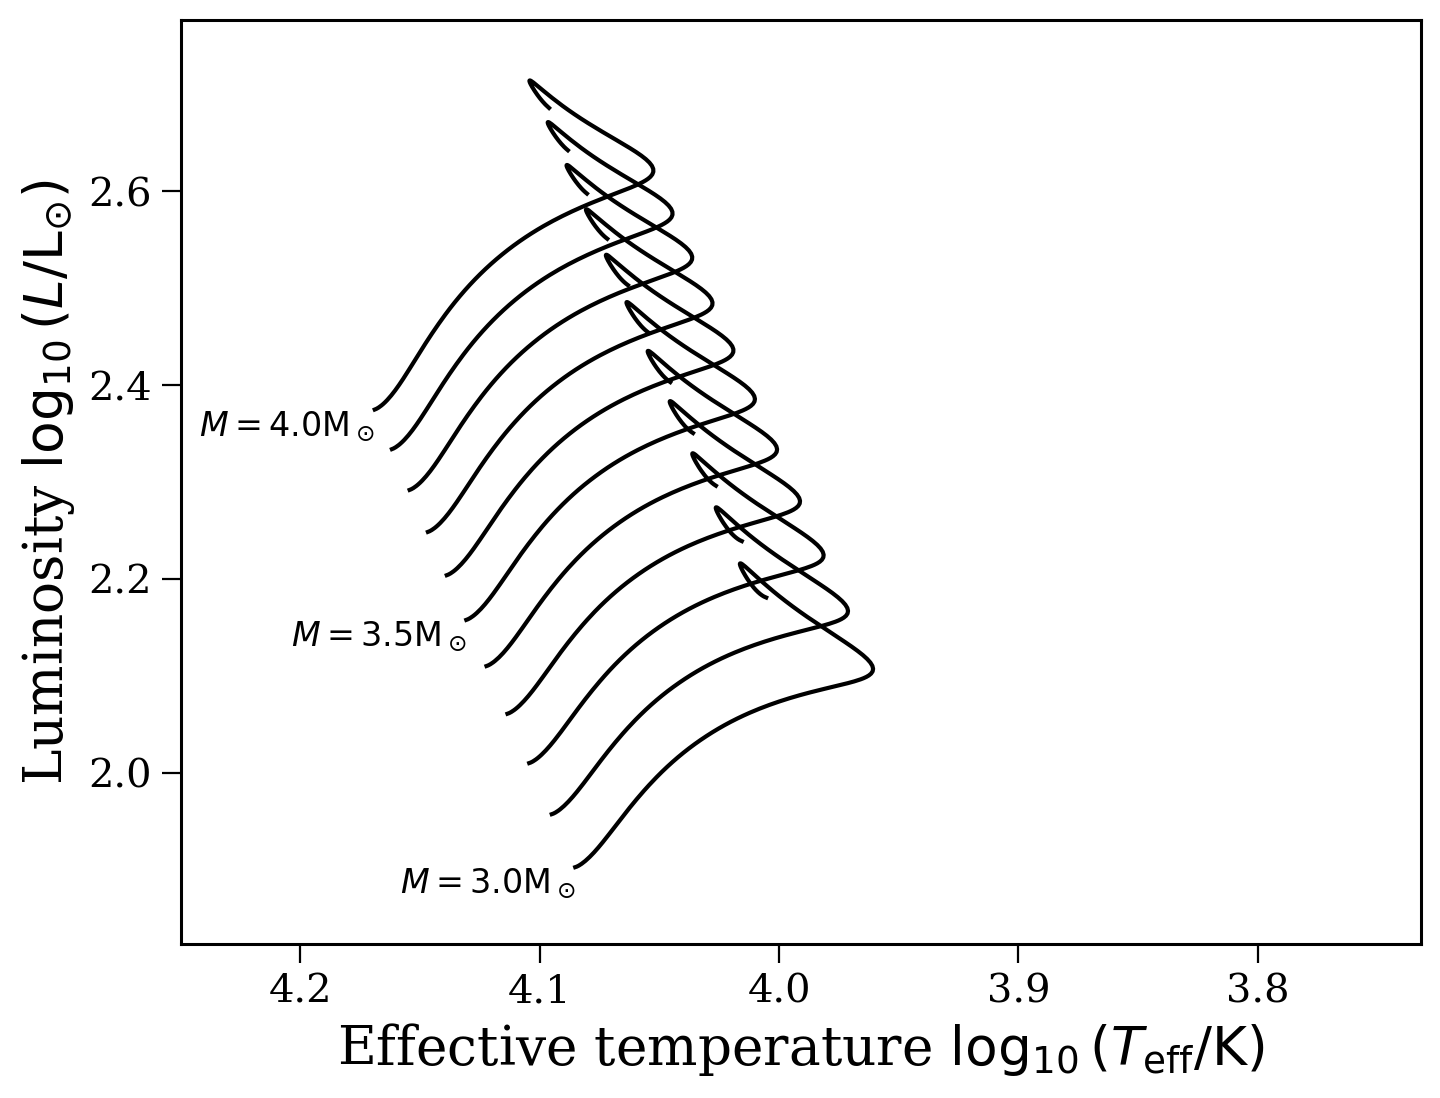

In [16]:
for folder, label in zip(["4_3_5_mdm100"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$"]):
    t1, t2 = tracks[folder]

    fig, ax = None, None
    for track, cmap in zip(tracks[folder], ["viridis", "viridis"]):
        fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=0, cmap=cmap,
                                cbar_var=None, plot_line=False)
        fig, ax = mpt.add_singles_tracks(fig, ax, tracks=single_tracks_mdm20, Ms=np.arange(3.0, 4.1, 0.1), colour="black")
        break
    ax.set_xlim(left=4.25)

    plt.savefig("presentation_plots/hrd_singles.png", format="png", bbox_inches="tight", dpi=300)
    plt.show()

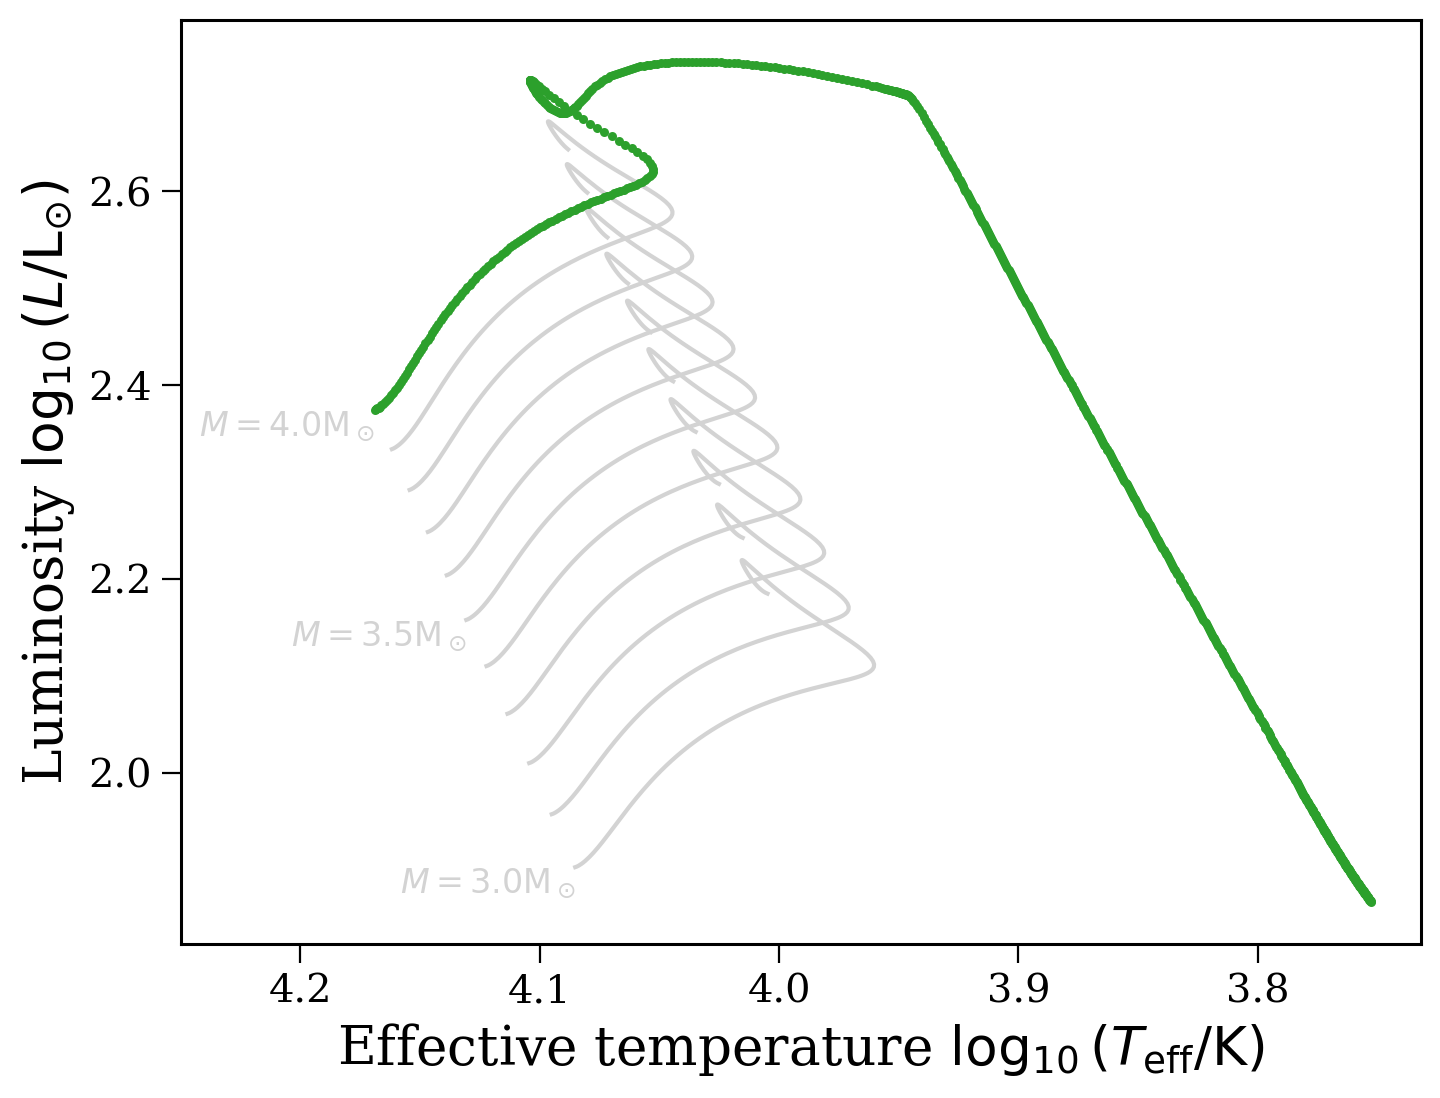

In [41]:
for folder, label in zip(["4_3_5_mdm100"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$"]):
    t1, t2 = tracks[folder]

    fig, ax = None, None
    for track, cmap in zip(tracks[folder], ["tab:green", mpt.mass_gainer_col]):
        fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=5, color=cmap,
                                cbar_var=None)
        fig, ax = mpt.add_singles_tracks(fig, ax, tracks=single_tracks_mdm20, Ms=np.arange(3.0, 4.1, 0.1), colour="black")
        break
    ax.set_xlim(left=4.25)

    plt.savefig("presentation_plots/hrd_donor.png", format="png", bbox_inches="tight", dpi=300)
    plt.show()

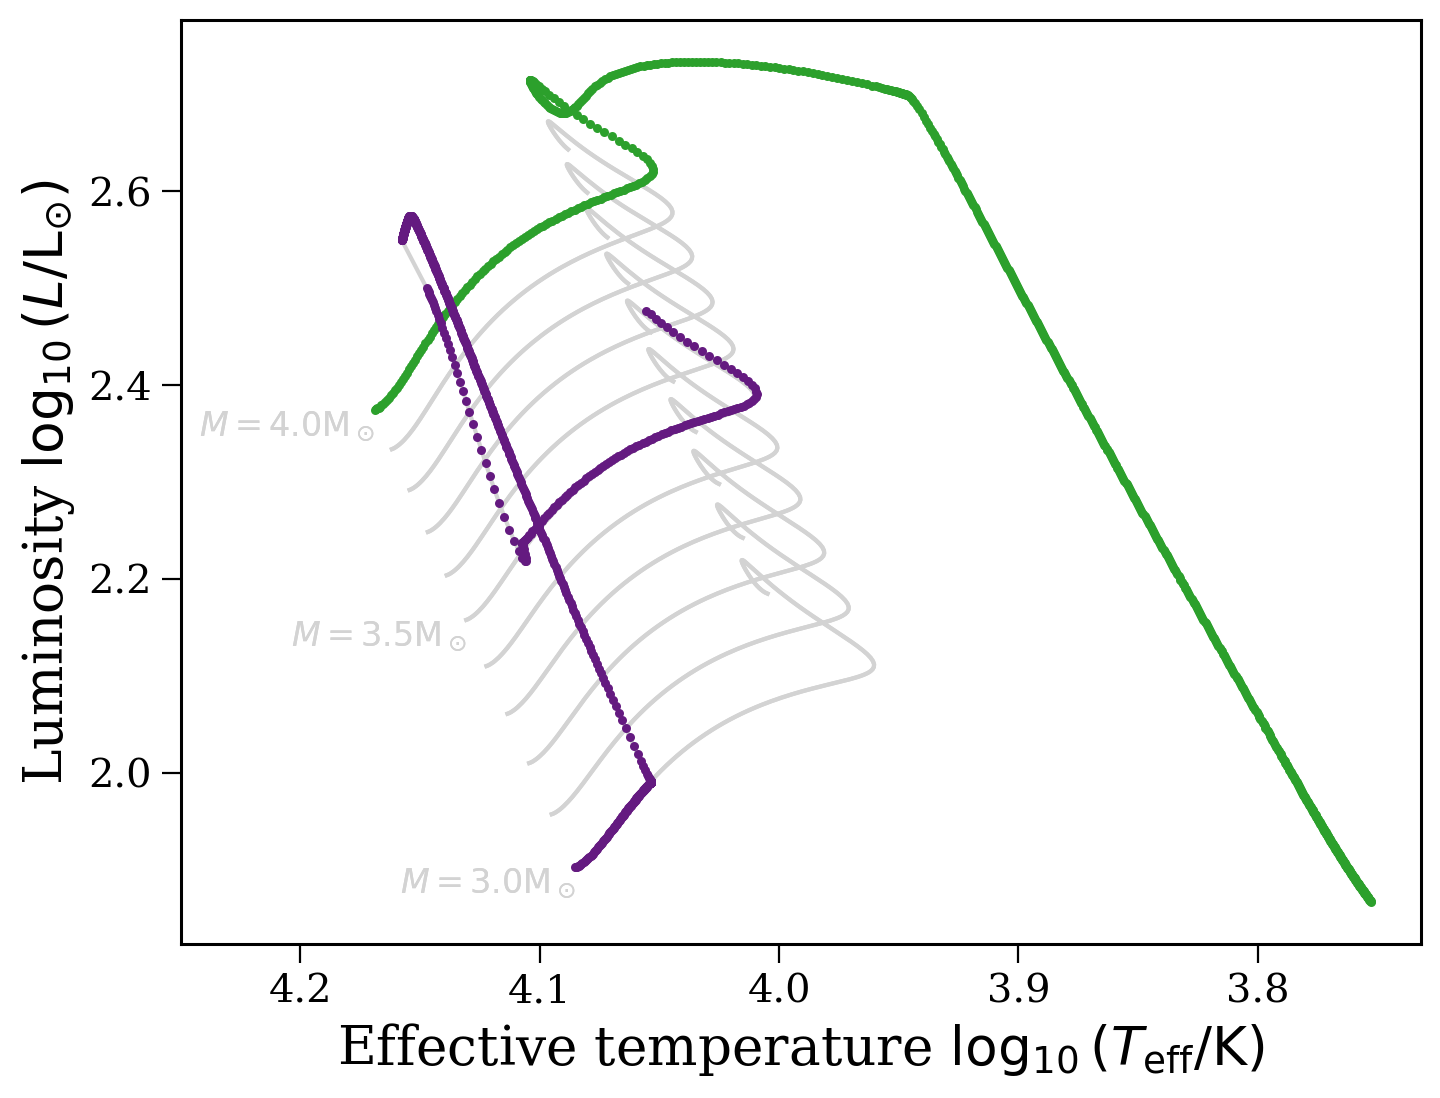

In [42]:
for folder, label in zip(["4_3_5_mdm100"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$"]):
    t1, t2 = tracks[folder]

    fig, ax = None, None
    for track, cmap in zip(tracks[folder], ["tab:green", mpt.mass_gainer_col]):
        if "surface_he" not in track.history.columns:
            append_surface_He_abundance(track)
        fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=5, color=cmap,
                                cbar_var=None)
        fig, ax = add_singles_tracks(fig, ax, Ms=np.arange(3.0, 4.1, 0.1))
    ax.set_xlim(left=4.25)

    plt.savefig("presentation_plots/hrd_both.png", format="png", bbox_inches="tight", dpi=300)
    plt.show()

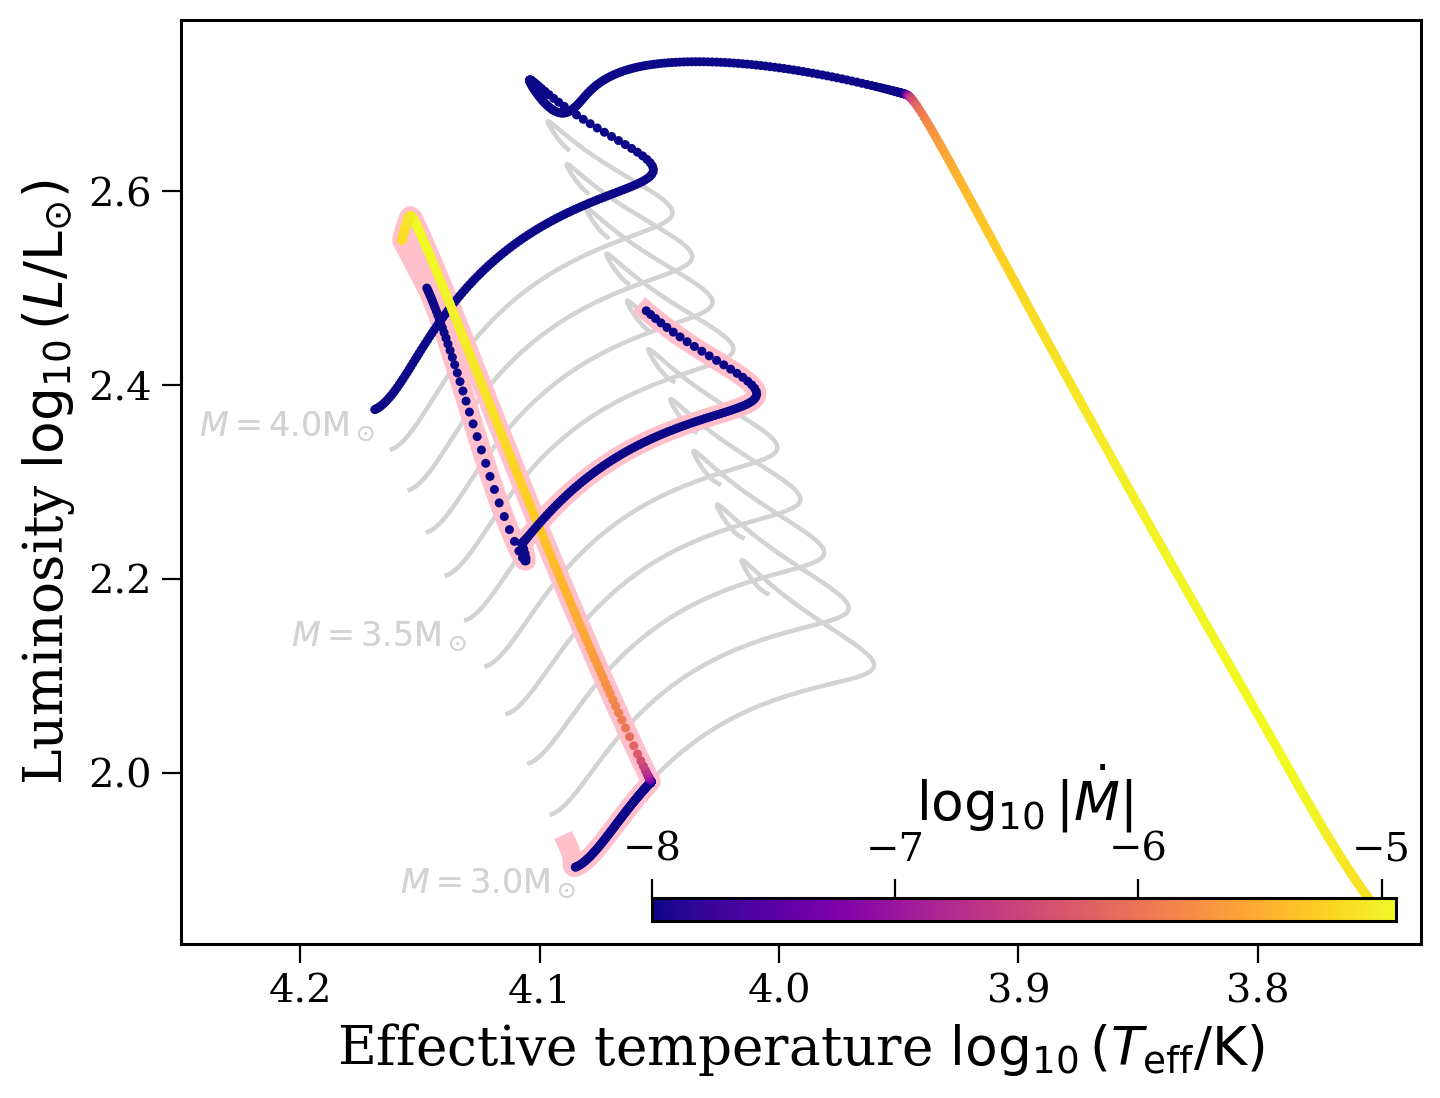

In [45]:
for folder, label in zip(["4_3_5_mdm100"],
                         [r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$"]):
    t1, t2 = tracks[folder]

    fig, ax = None, None
    for track, cmap in zip(tracks[folder], ["plasma", "plasma"]):
        if "surface_he" not in track.history.columns:
            append_surface_He_abundance(track)
        fig, ax = mpt.simple_hr(track, fig=fig, ax=ax, show=False, s=5, cmap=cmap,
                                cbar_var="log_abs_mdot", cbar_label=r"$\log_{10} |\dot{M}|$", vmin=-8)#, vmin=0.275, vmax=0.385)
        fig, ax = add_singles_tracks(fig, ax, Ms=np.arange(3.0, 4.1, 0.1))
    ax.set_xlim(left=4.25)

    ax.plot(track.history["log_Teff"], track.history["log_L"], linewidth=7, color="pink", zorder=-1)

    plt.savefig("presentation_plots/hrd_mdot.png", format="png", bbox_inches="tight", dpi=300)
    plt.show()

# X_H profiles

In [17]:
def get_timesteps(track, start, stop, step, mt_step, delay=0):
    h = track.history
    
    m = h["star_mass"]
    mt_start, mt_end = m[m > m.min()].index[0], m[m == m.max()].index[0]
    age_start = round(h["star_age"].loc[mt_start] / 1e6, 1)
    age_end = round(h["star_age"].loc[mt_end] / 1e6, 1)
    
    t_before = np.arange(start, np.floor(age_start), step)
    t_mt = np.arange(age_start, age_end + mt_step, mt_step)
    t_after = np.arange(np.ceil(age_end), stop + step, step)
    
    t = np.concatenate((t_before, t_mt, t_after))
    
    if delay > 0:
        t = np.concatenate((t, np.repeat(t[-1], delay)))
    return t

In [18]:
def get_Xc_steps(track, start, stop, step, mt_step, delay=0):
    h = track.history
    
    m = h["star_mass"]
    mt_start, mt_end = m[m > m.min()].index[0], m[m == m.max()].index[0]
    xc_start = round(h["center_h1"].loc[mt_start], 1)
    xc_end = round(h["center_h1"].loc[mt_end], 1)
    
    t_before = np.arange(start, xc_start, step)
    t_mt = np.arange(xc_start, xc_end + mt_step, mt_step)
    t_after = np.arange(xc_end, stop + step, step)
    
    t = np.concatenate((t_before, t_mt, t_after))
    
    if delay > 0:
        t = np.concatenate((t, np.repeat(t[-1], delay)))
    return t

In [21]:
reload(mpt)

<module 'mpt' from '/afs/mpa/temp/tomwagg/kavli/notebooks/../helpers/mpt.py'>

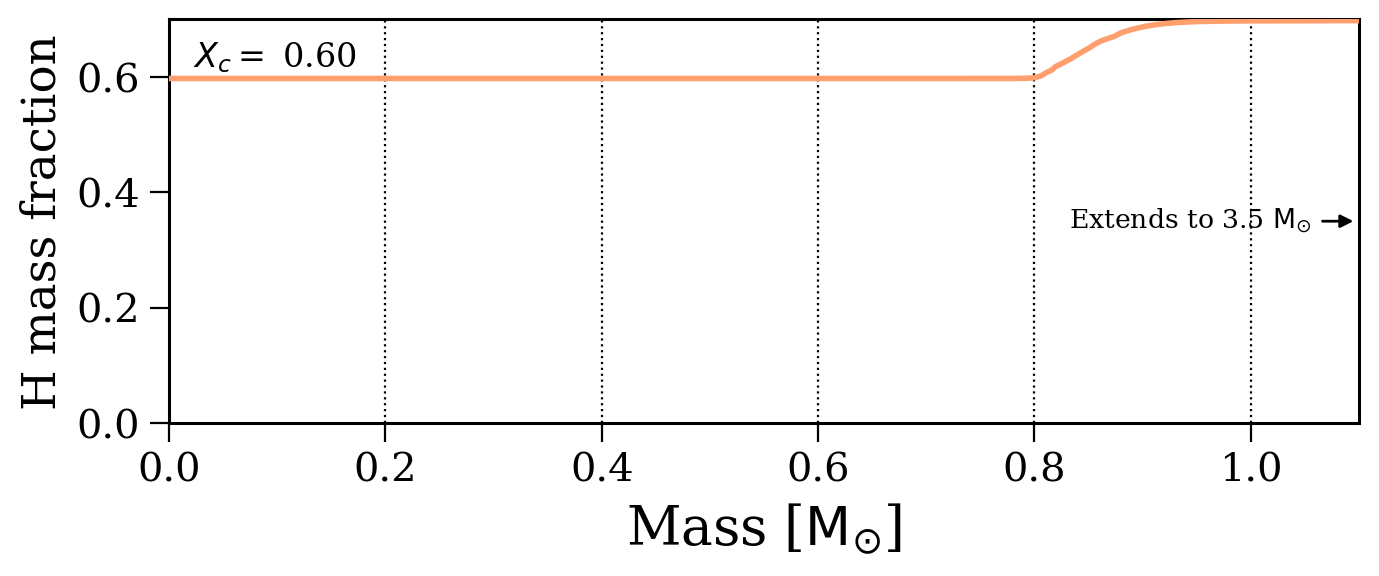

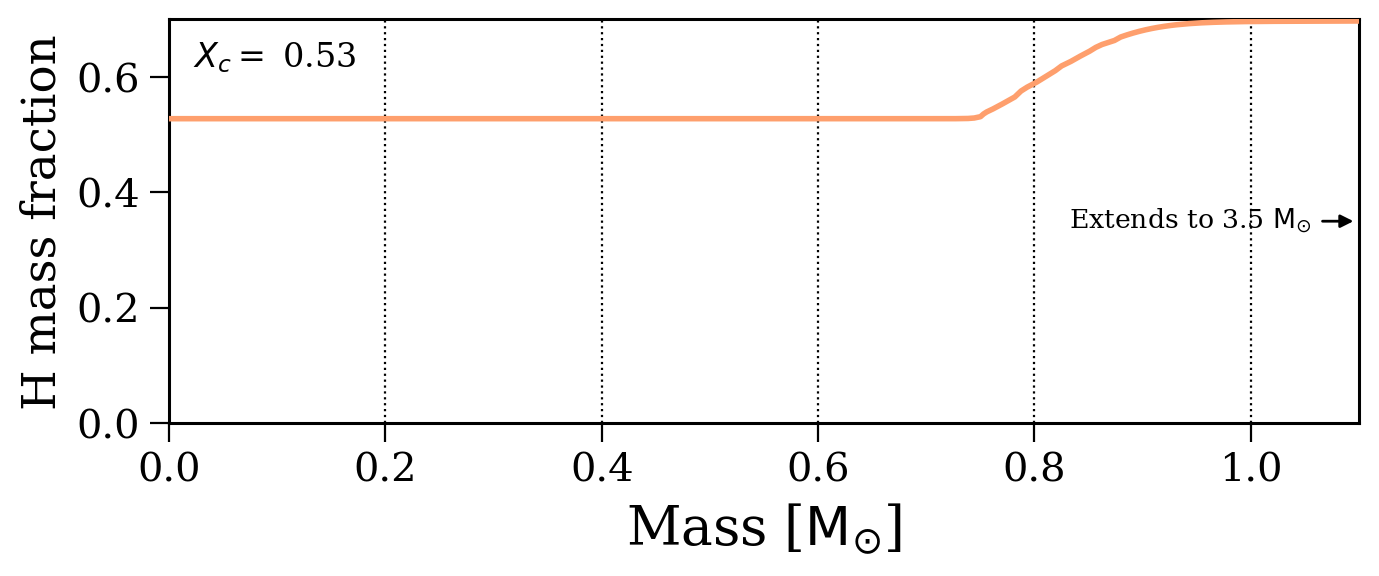

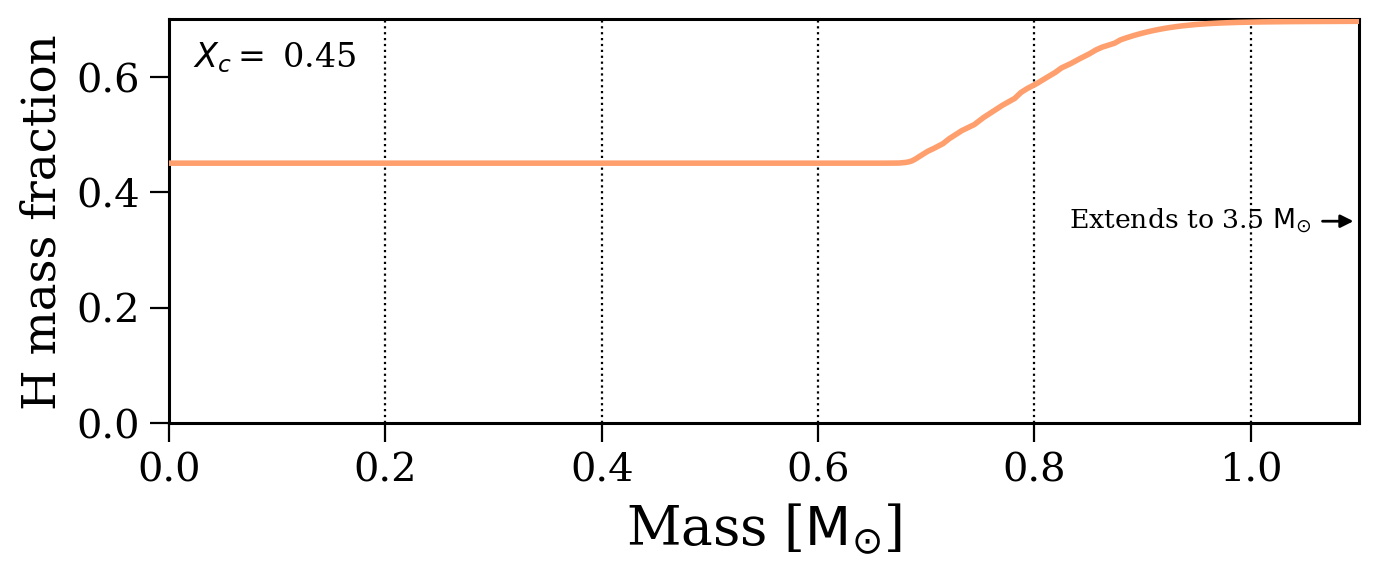

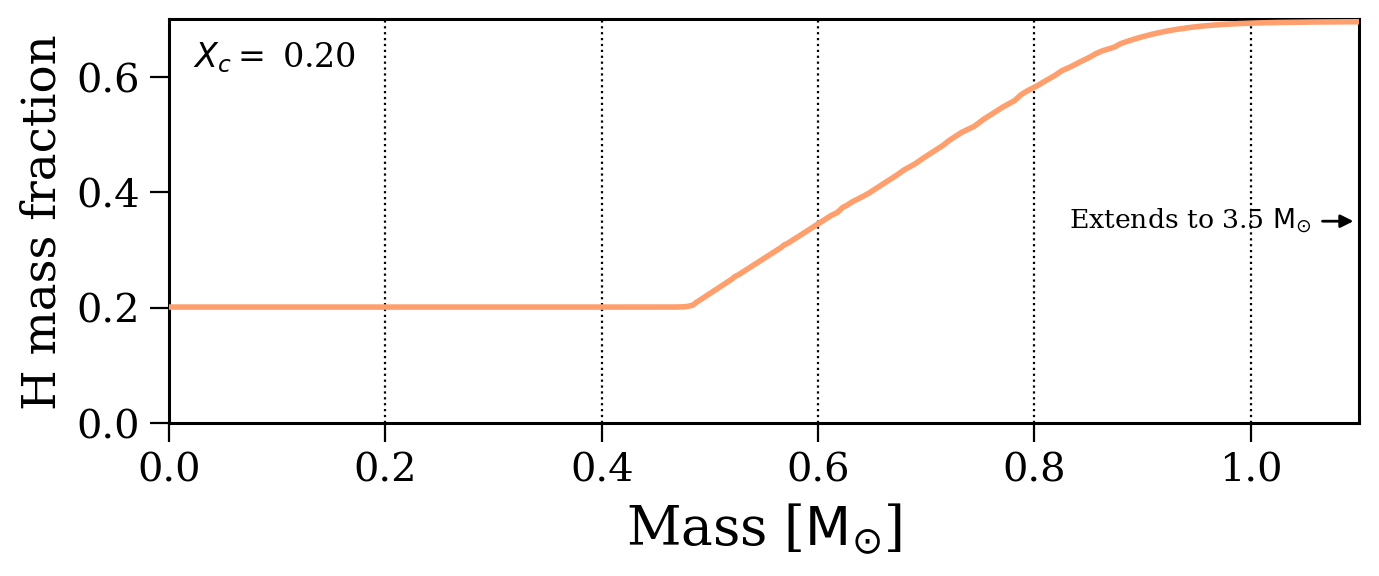

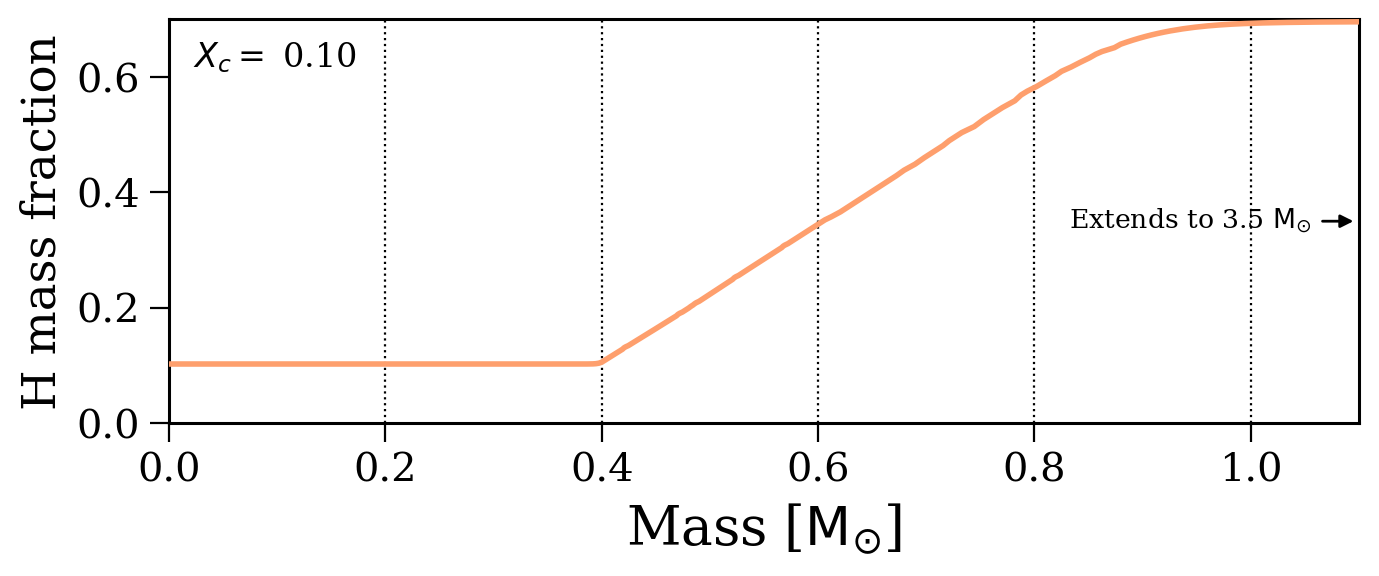

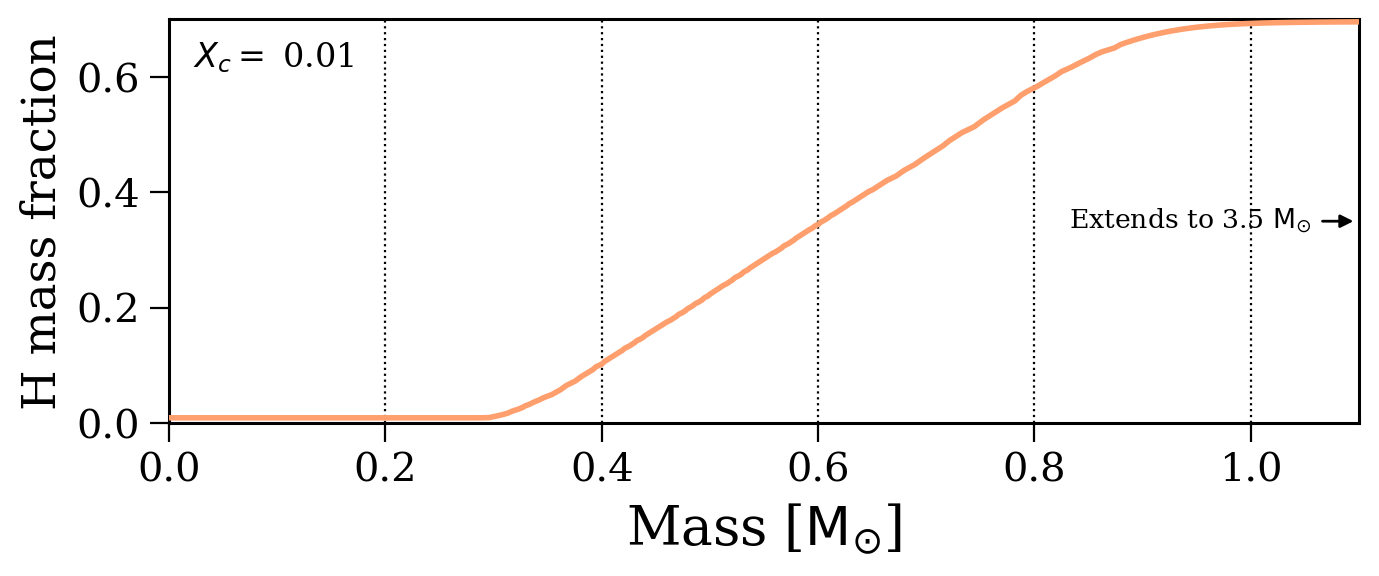

In [29]:
for X_c in [0.6, 0.53, 0.45, 0.2, 0.1, 0.01]:
    fig, ax = mpt.plot_X_H_profile(X_c=X_c, tracks=[single_tracks["M_3.5"]],
                                   colours=[mpt.single_col], show=False, label_with="an", annotate_col="black")
    ax.grid(axis="x", linestyle="dotted", color="black")
    ax.get_legend().remove()
    plt.savefig(f"presentation_plots/X_H_profile_mdm20_single_Xc_{X_c}.png", format="png", bbox_inches="tight", dpi=300)

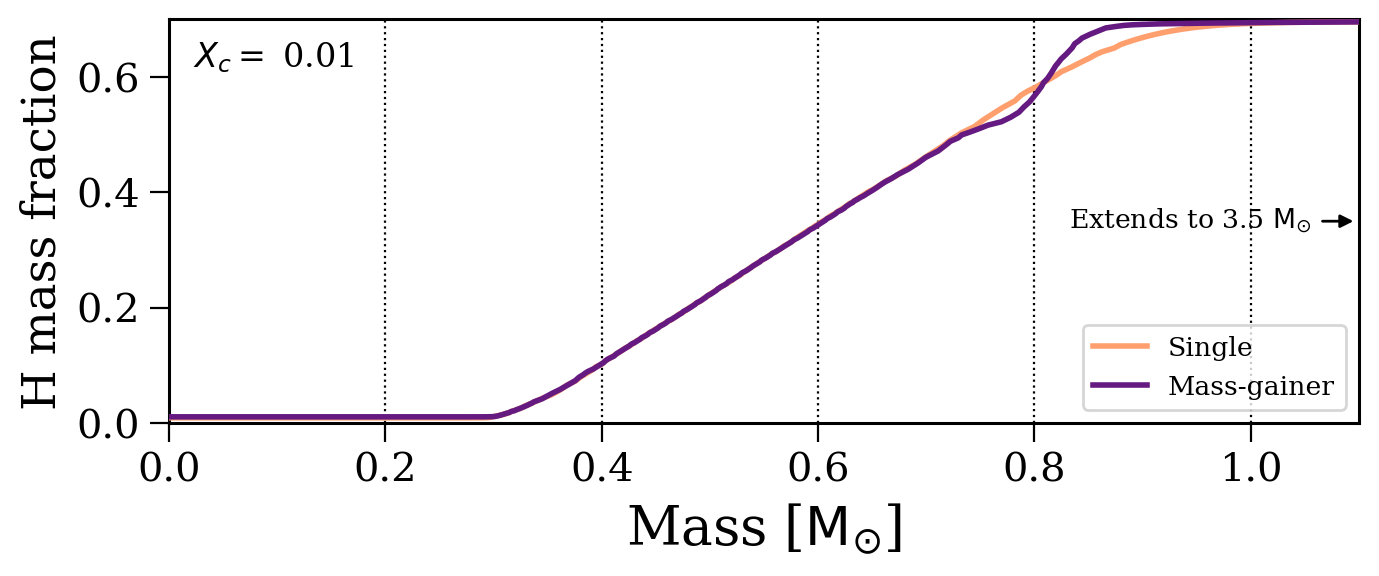

In [28]:
for X_c in [0.01]:
    fig, ax = mpt.plot_X_H_profile(X_c=X_c, tracks=[single_tracks["M_3.5"], tracks["D_20"][1]],
                                   colours=[mpt.single_col, mpt.mass_gainer_col], labels=["Single", "Mass-gainer"], show=False, label_with="an", annotate_col="black")
    ax.grid(axis="x", linestyle="dotted", color="black")
    plt.savefig("presentation_plots/X_H_profile_compare.png", format="png", bbox_inches="tight", dpi=300)

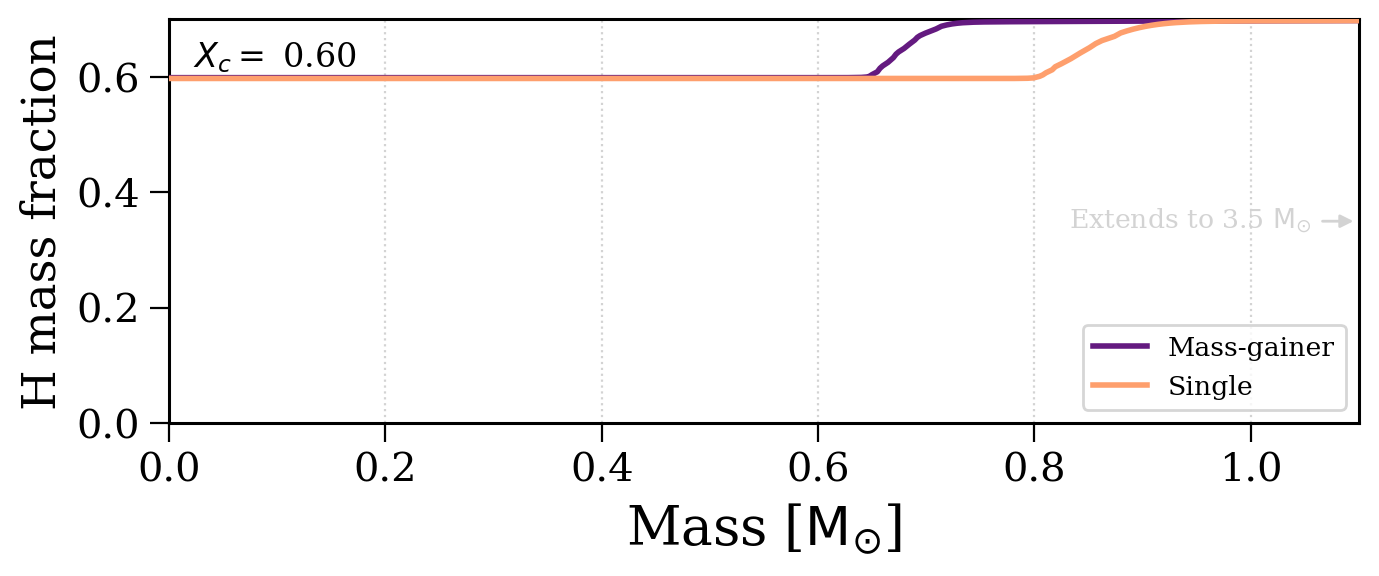

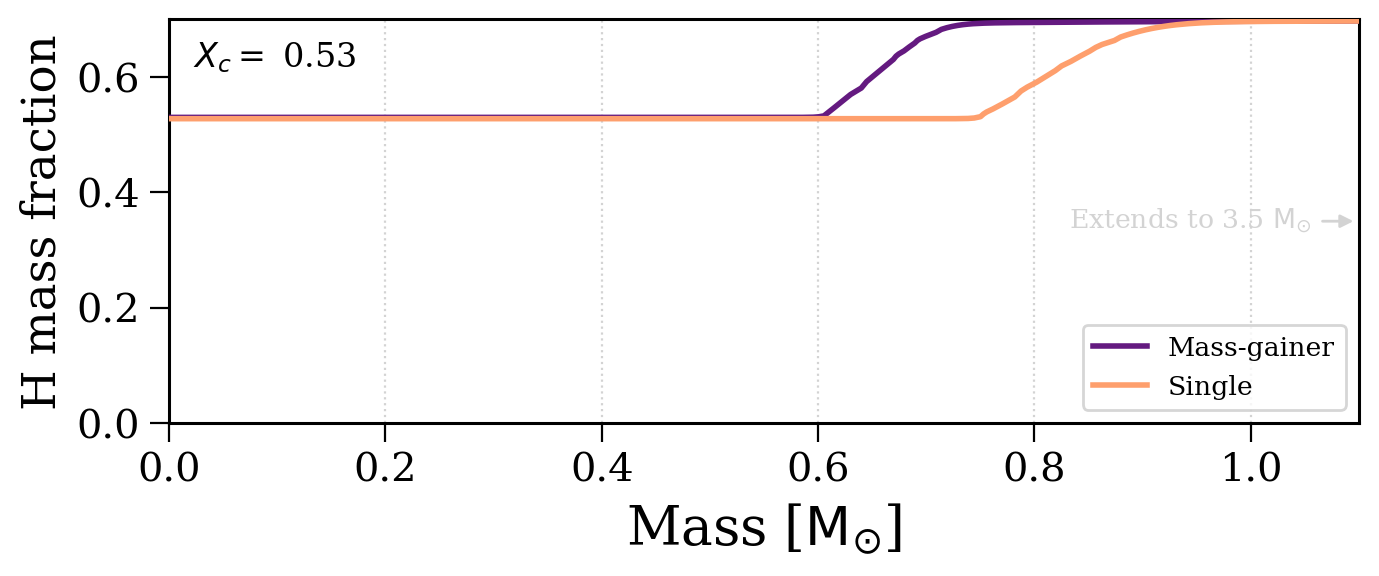

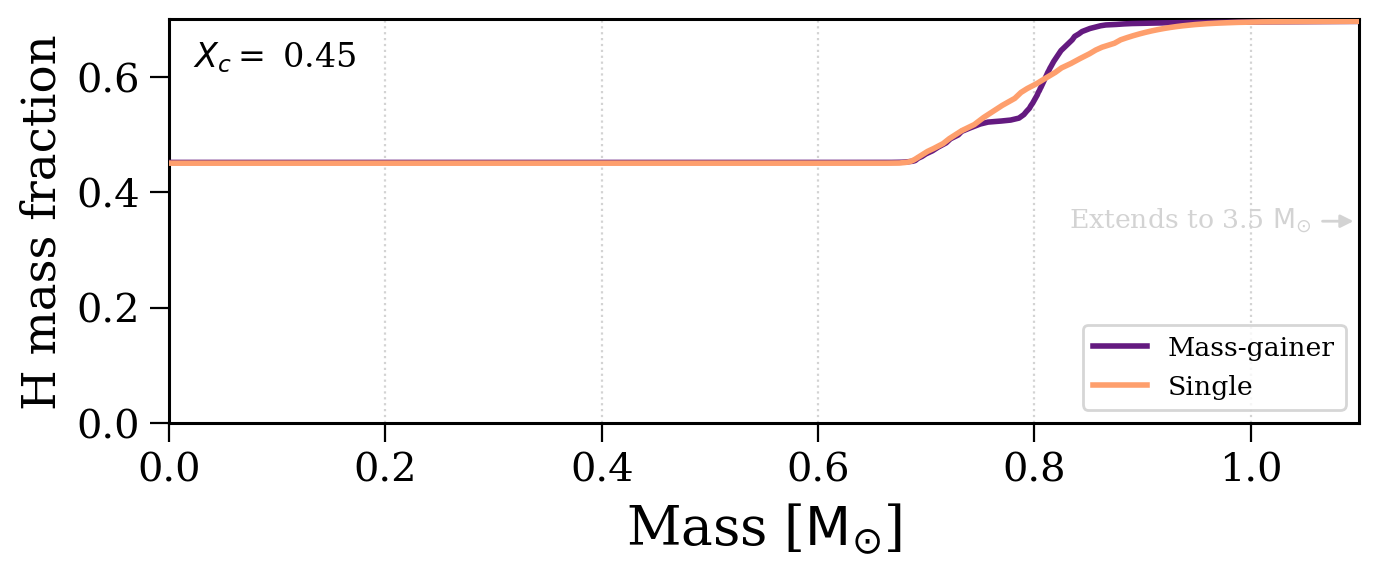

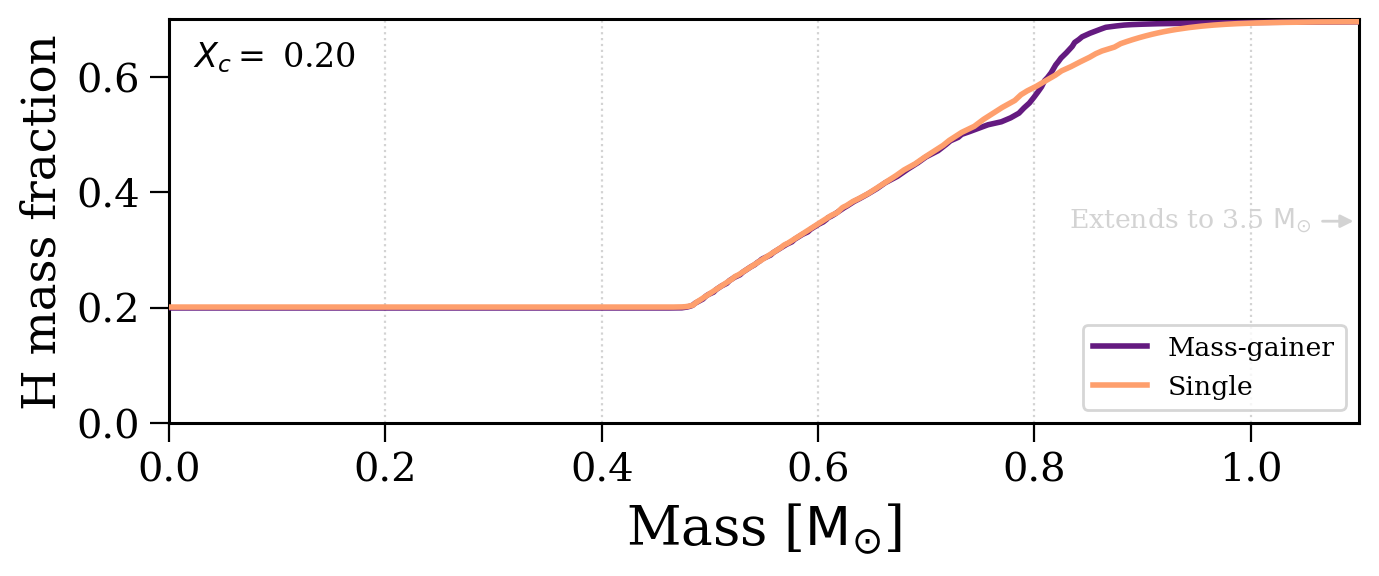

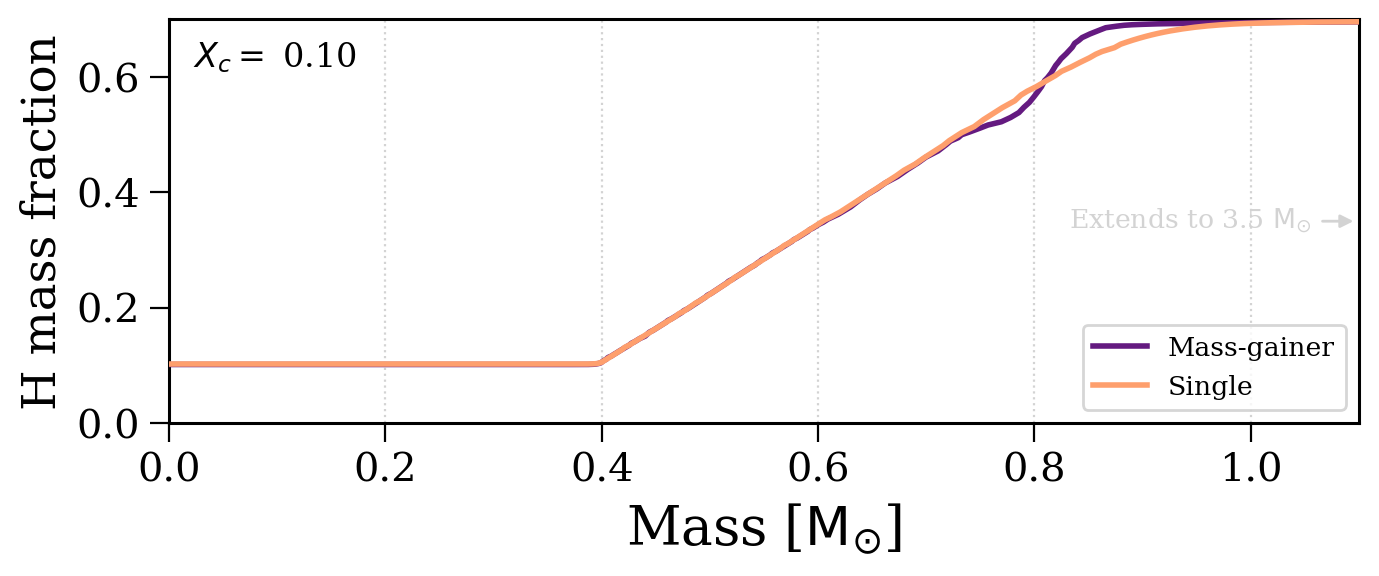

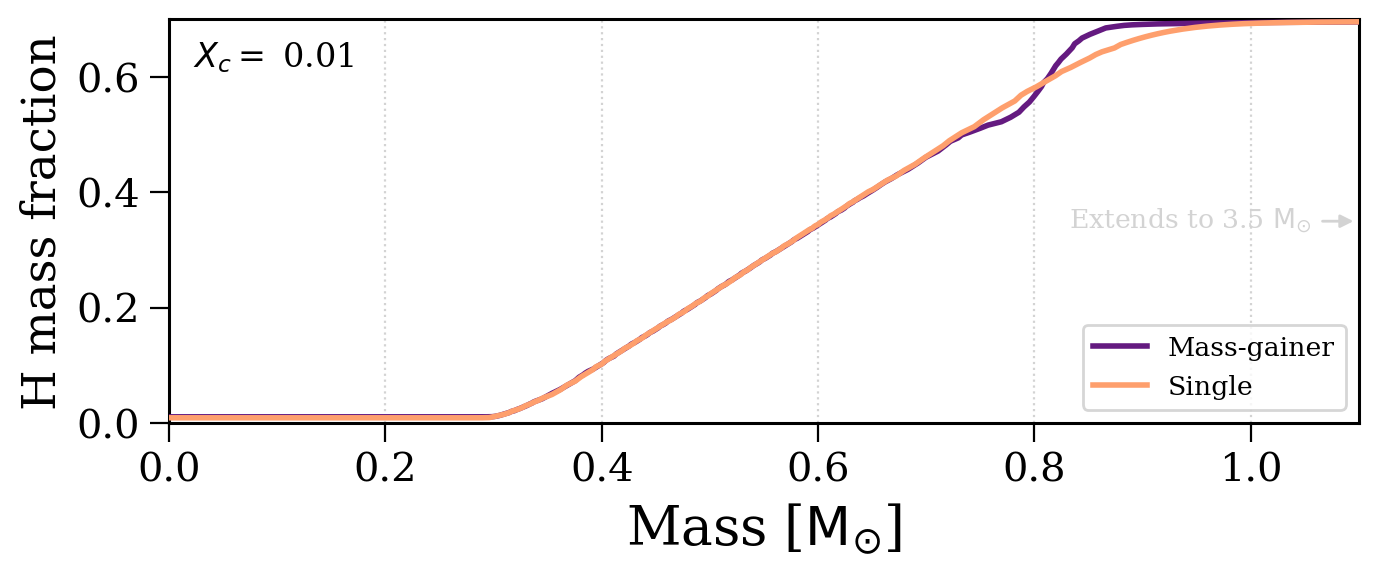

In [25]:
refresh_mpt()
for X_c in [0.6, 0.53, 0.45, 0.2, 0.1, 0.01]:
    fig, ax = mpt.plot_X_H_profile(X_c=X_c, tracks=[tracks["D_20"][1], single_tracks["M_3.5"]], show=False, label_with="an")
    ax.grid(axis="x", linestyle="dotted", color="lightgrey")
    # plt.savefig(f"presentation_plots/X_H_profile_mdm20_Xc_{X_c}.png", format="png", bbox_inches="tight", dpi=300)

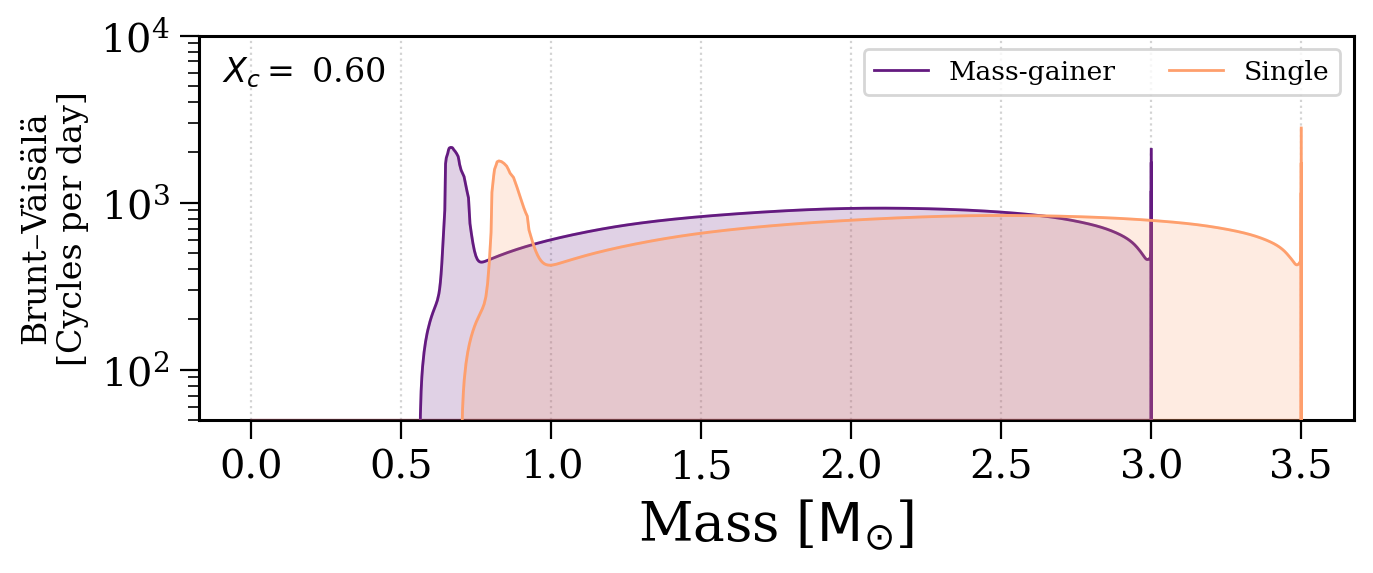

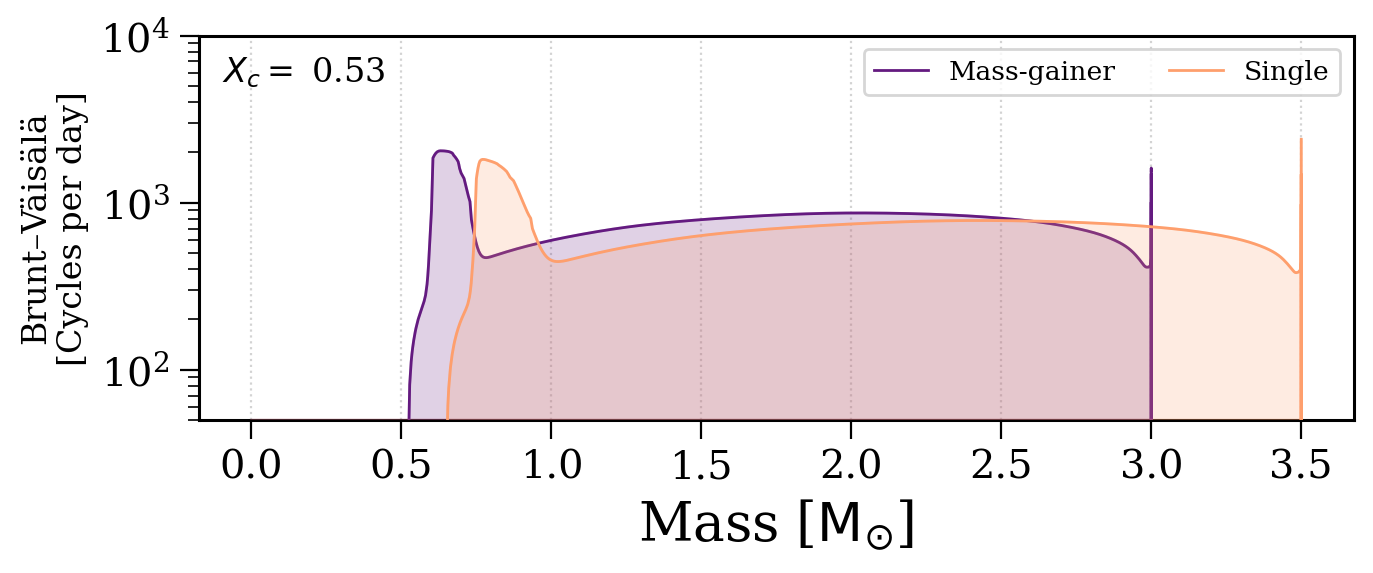

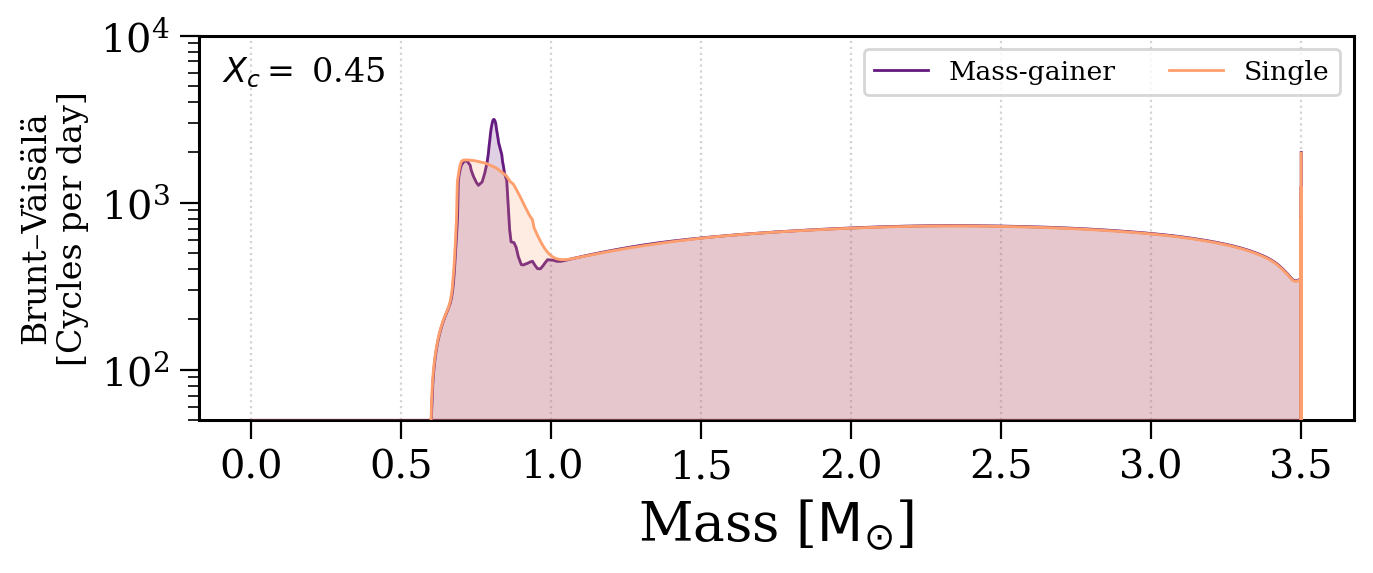

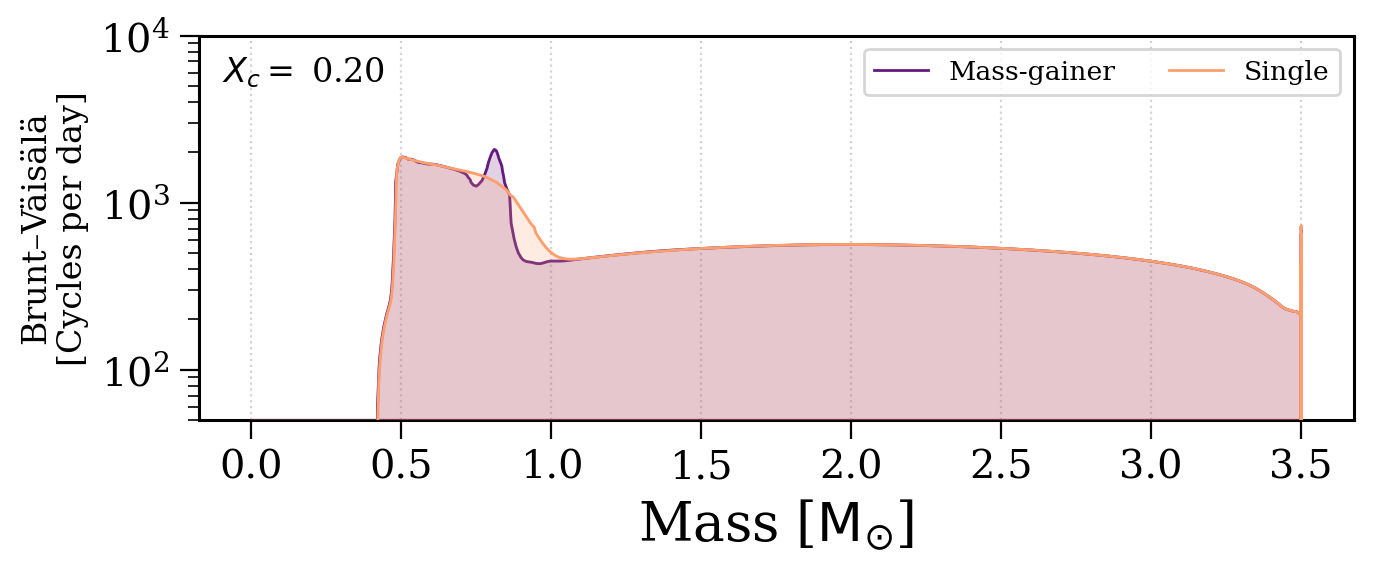

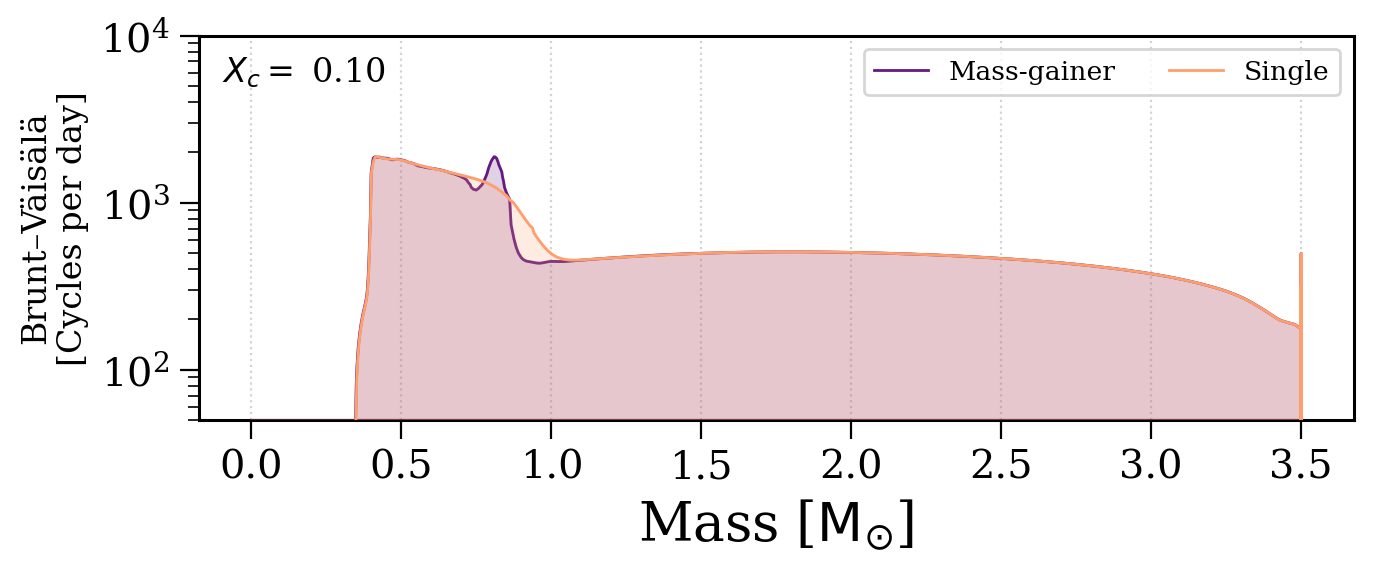

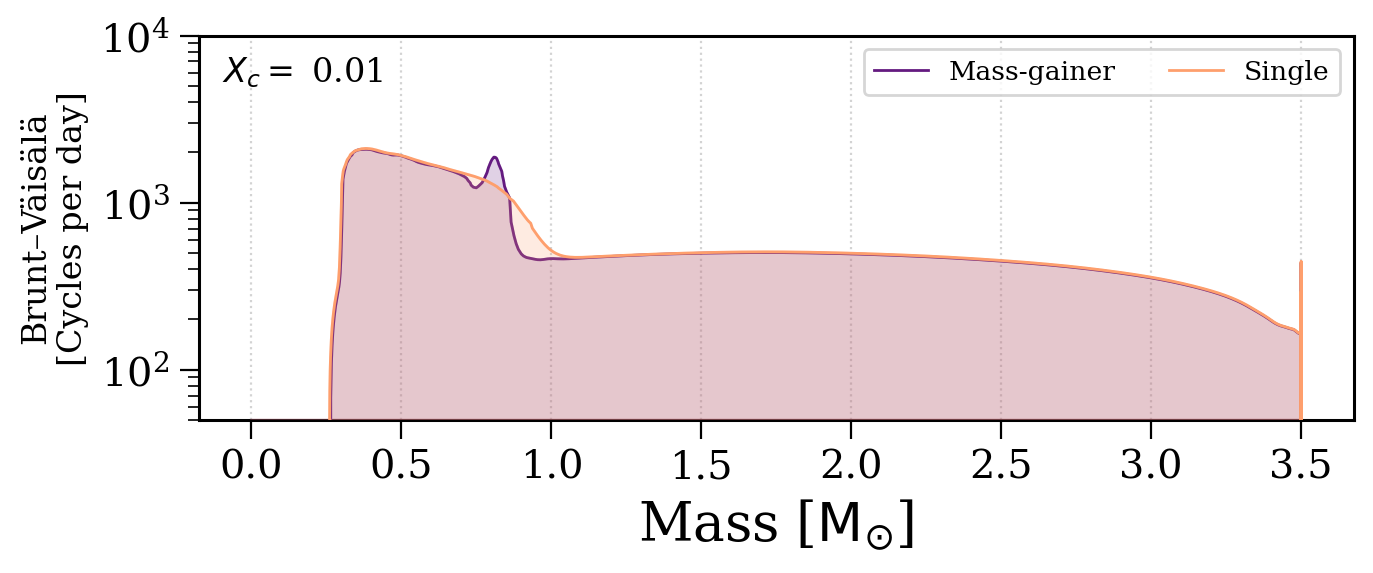

In [122]:
for X_c in [0.6, 0.53, 0.45, 0.2, 0.1, 0.01]:
    fig, ax = mpt.plot_BV_profile(X_c=X_c, tracks=[tracks["D_20"][1], single_tracks["M_3.5"]], show=False, label_with="an")
    ax.grid(axis="x", linestyle="dotted", color="lightgrey")
    plt.savefig(f"presentation_plots/BV_profile_mdm20_Xc_{X_c}.png", format="png", bbox_inches="tight", dpi=300)

10.0 None [<mesagrid.Track object at 0x7f57c8693e50>, <mesagrid.Track object at 0x7f566f001720>] ['Mass-gainer', 'Single'] [(0.390384, 0.100379, 0.501864, 1.0), (0.994738, 0.62435, 0.427397, 1.0)] Figure(700x300) Axes(0.125,0.11;0.775x0.77) False title False
10.0 None [<mesagrid.Track object at 0x7f57c8693e50>, <mesagrid.Track object at 0x7f566f001720>] ['Mass-gainer', 'Single'] [(0.390384, 0.100379, 0.501864, 1.0), (0.994738, 0.62435, 0.427397, 1.0)] Figure(700x300) Axes(0.128591,0.277234;0.84998x0.594988) False title False


/afs/mpa/temp/tomwagg/kavli/notebooks/../helpers/mesaplot_tom.py:188: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


15.0 None [<mesagrid.Track object at 0x7f57c8693e50>, <mesagrid.Track object at 0x7f566f001720>] ['Mass-gainer', 'Single'] [(0.390384, 0.100379, 0.501864, 1.0), (0.994738, 0.62435, 0.427397, 1.0)] Figure(700x300) Axes(0.128591,0.277234;0.84998x0.594988) False title False
20.0 None [<mesagrid.Track object at 0x7f57c8693e50>, <mesagrid.Track object at 0x7f566f001720>] ['Mass-gainer', 'Single'] [(0.390384, 0.100379, 0.501864, 1.0), (0.994738, 0.62435, 0.427397, 1.0)] Figure(700x300) Axes(0.128591,0.277234;0.84998x0.594988) False title False
25.0 None [<mesagrid.Track object at 0x7f57c8693e50>, <mesagrid.Track object at 0x7f566f001720>] ['Mass-gainer', 'Single'] [(0.390384, 0.100379, 0.501864, 1.0), (0.994738, 0.62435, 0.427397, 1.0)] Figure(700x300) Axes(0.128591,0.277234;0.84998x0.594988) False title False
30.0 None [<mesagrid.Track object at 0x7f57c8693e50>, <mesagrid.Track object at 0x7f566f001720>] ['Mass-gainer', 'Single'] [(0.390384, 0.100379, 0.501864, 1.0), (0.994738, 0.62435, 0.4

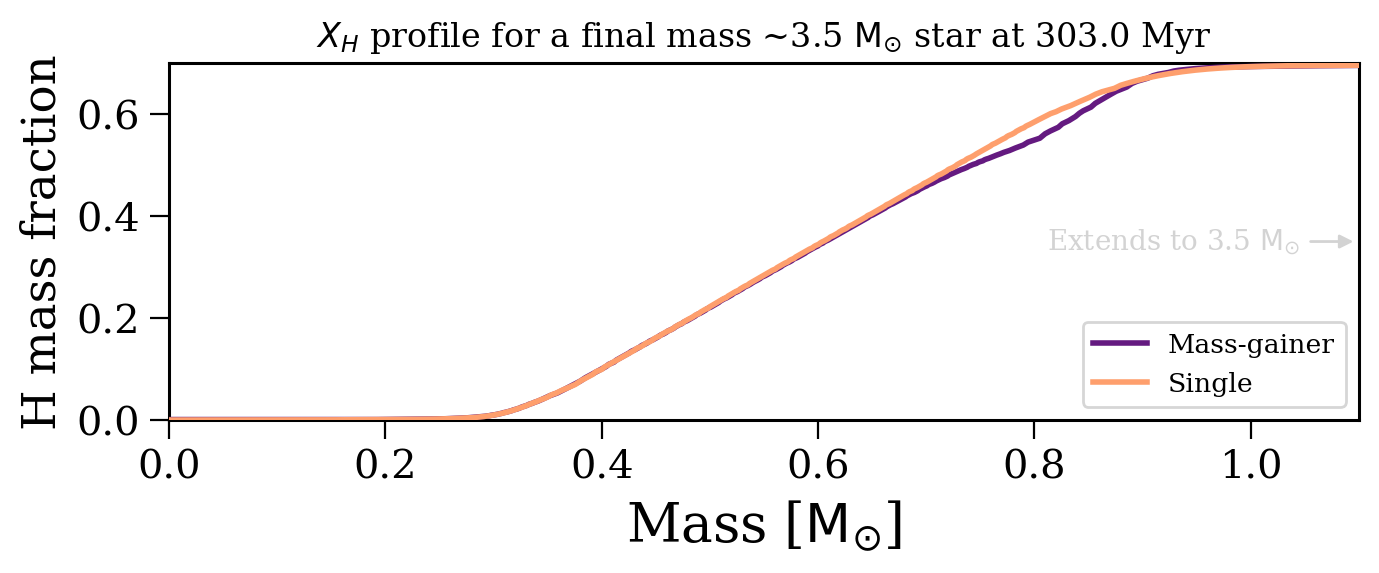

In [103]:
fig, ax = plt.subplots(figsize=(7, 3))
ani = FuncAnimation(fig, mpt.plot_X_H_profile,
                    get_timesteps(tracks["4_3_5_mdm100"][1], 10, 300, 5, 0.01, delay=15),
                    fargs=(None, [tracks["4_3_5_mdm100"][1], single_tracks["M_3.5"]], ["Mass-gainer", "Single"],
                    [mpt.mass_gainer_col, mpt.single_col], fig, ax, False, "title", False), repeat=True)

writer = animation.PillowWriter(fps=5,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('presentation_plots/X_H_profile_mdm100.gif', writer=writer, dpi=300)

plt.show()

/afs/mpa/temp/tomwagg/kavli/notebooks/../helpers/mesaplot_tom.py:242: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


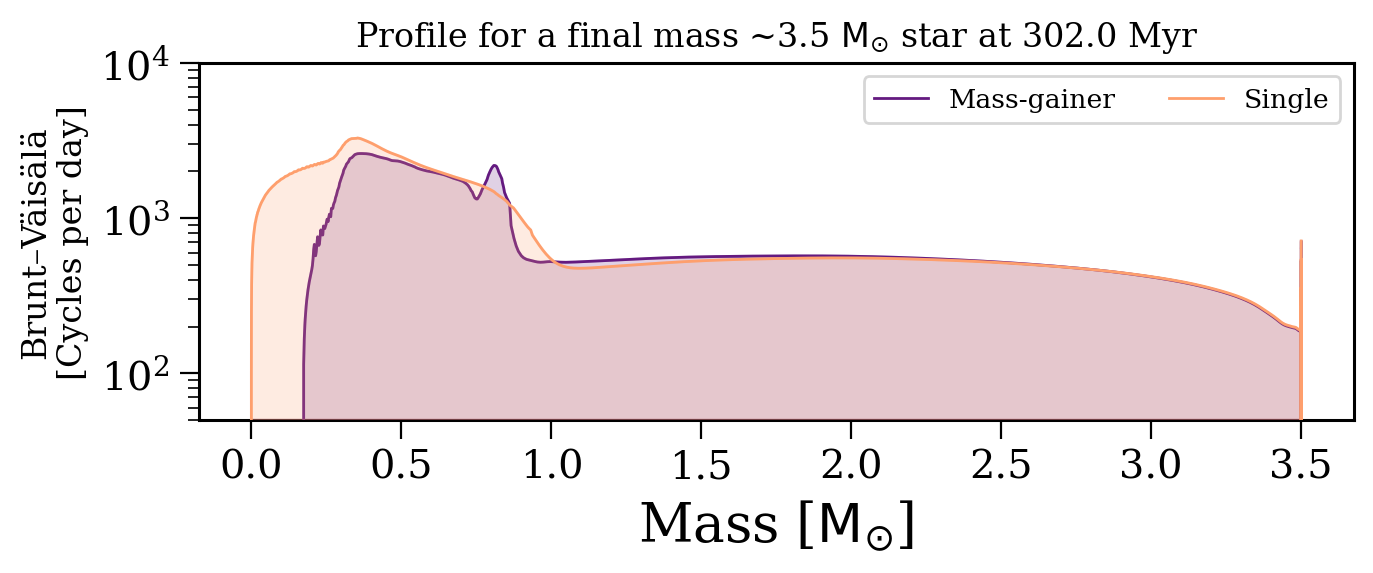

In [111]:
fig, ax = plt.subplots(figsize=(7, 3))
ani = FuncAnimation(fig, mpt.plot_BV_profile,
                    get_timesteps(tracks["D_20"][1], 10, 300, 5, 0.01, delay=15),
                    fargs=(None, [tracks["D_20"][1], single_tracks["M_3.5"]], ["Mass-gainer", "Single"],
                    [mpt.mass_gainer_col, mpt.single_col], 1, "linear", False, False, True,
                    fig, ax, False, "title", "upper right"), repeat=True)

writer = animation.PillowWriter(fps=5,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('presentation_plots/BV_profile_mdm20.gif', writer=writer, dpi=300)

plt.show()

None 0.2 [<mesagrid.Track object at 0x7f565e7cc160>, <mesagrid.Track object at 0x7f566f001720>] ['Mass-gainer', 'Single'] [(0.390384, 0.100379, 0.501864, 1.0), (0.994738, 0.62435, 0.427397, 1.0)] None None True an False


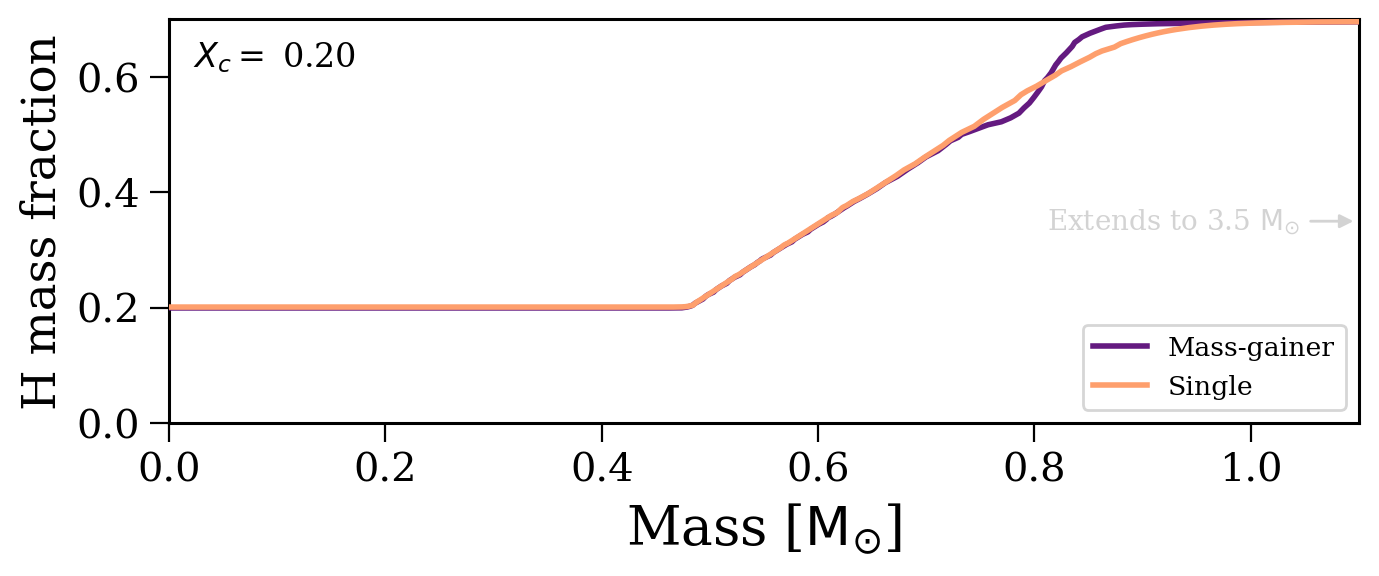

(<Figure size 700x300 with 1 Axes>,
 <Axes: xlabel='Mass [$\\rm M_{\\odot}$]', ylabel='H mass fraction'>)

In [108]:
mpt.plot_X_H_profile(X_c=0.2, tracks=[tracks["D_20"][1], single_tracks["M_3.5"]], label_with="an")

In [10]:
def get_years_after_mod(track, mod, years, verbose=True):
    start_time = track.history.loc[mod - 1]["star_age"]
    end_time = start_time + years
    
    diff = np.abs(track.history["star_age"].values - end_time)
    argmin_diff = np.argmin(diff)
    
    actual_time_step = track.history["star_age"].values[np.argmin(diff)] - start_time

    if verbose:
        print(f"The closest time I can find is {actual_time_step / 1e3:1.2f} kyr after this model")
    
    return track.history["model_number"][argmin_diff]

In [11]:
def accretor_rel_MT(track, years=None, rel_to="start", extra_title=None, verbose=False):

    if rel_to == "both":
        accretor_rel_MT(track, years=years, rel_to="start", extra_title=extra_title)
        accretor_rel_MT(track, years=years, rel_to="end", extra_title=extra_title)
        return

    mt_mod_nums = track.history[track.history["log_abs_mdot"] > -10.0]["model_number"]
    mt_start, mt_end = mt_mod_nums.min(), mt_mod_nums.max()

    if years is None:
        if rel_to == "start":
            t_start, t_end = track.history.loc[mt_start - 1]["star_age"], track.history.loc[mt_end - 1]["star_age"]
            years = np.linspace(t_start, t_end, 5) - t_start
        else:
            t_start, t_end = track.history.loc[mt_end - 1]["star_age"], track.history.iloc[-1]["star_age"]
            years = np.linspace(t_start, t_end, 5) - t_start

    fig, axes = plt.subplots(1, 2, figsize=(8, 3), gridspec_kw={"width_ratios": [16, 1]})
    fig.subplots_adjust(wspace=0.0)

    ax, cbar_ax = axes

    cmap = plt.get_cmap("cividis_r")

    colours = cmap(np.linspace(0, 1, len(years)))
    inds = range(len(years))

    for year, col, ind in zip(years, colours, inds):
        mod = get_years_after_mod(track, mt_start if rel_to == "start" else mt_end, year, verbose=verbose)
        ax.plot(track.profiles[mod - 1]["mass"], track.profiles[mod - 1]["x_mass_fraction_H"], color=col,
                zorder=10 + len(years) - ind)# if rel_to == "start" else None)
    ax.set_ylim(0, 1)

    norm = mpl.colors.Normalize(vmin=min(years) / 1e6, vmax=max(years) / 1e6)

    cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm)
    cb1.ax.tick_params(labelsize=0.5*fs)
    cb1.set_label(f"Time after mass\ntransfer f{'starts' if rel_to == 'start' else 'ends'} [Myr]", fontsize=0.5*fs)

    ax.set_xlabel(r"Mass $\mathbf{M/M_{\odot}}$")
    ax.set_ylabel(r"Hydrogren mass fraction", fontsize=0.5*fs)

    title = f"Accretor composition ({'During' if rel_to == 'start' else 'Post'} MT)"
    title = title + f" - {extra_title}" if extra_title is not None else title
    ax.set_title(title)

    plt.show()

In [ ]:
accretor_rel_MT(tracks["2.5_2_3_tm"][1], rel_to='both',
                extra_title=r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$" + "\nwith Thermohaline mixing")

In [ ]:
accretor_rel_MT(tracks["detach_2.5_2_4_tm"][1], rel_to='both',
                extra_title=r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 4 \, {\rm days}$, with Thermohaline mixing")

In [ ]:
accretor_rel_MT(tracks["detach_2.5_2_3"][1], rel_to='both',
                extra_title=r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$")

In [ ]:
accretor_rel_MT(tracks["detach_2.5_2_4"][1], rel_to='both',
                extra_title=r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 4 \, {\rm days}$")

In [ ]:
accretor_rel_MT(tracks["detach_4_3_5"][1], rel_to="both",
                extra_title=r"$m_1 = 4, m_2 = 3 {\rm M_\odot}$, $P = 5 \, {\rm days}$")

In [ ]:
track.history.columns[100:]

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
for folder, label in zip(["detach_2.5_2_4", "detach_2.5_2_3"],
                         [r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 4 \, {\rm days}$",
                          r"$m_1 = 2.5, m_2 = 2 {\rm M_\odot}$, $P = 3 \, {\rm days}$"]):
    fig, ax = plt.subplots(figsize=(8, 4))
    for track in reversed(list(tracks[folder])):
        scatter = ax.scatter(track.history["star_mass"], track.history["log_R"], c=track.history["log_abs_mdot"],
                            vmin=-8, s=5, cmap="plasma")

    cbar = fig.colorbar(scatter, label=r"$\log_{10} (|\dot{M}| / {\rm M_\odot \, yr^{-1}})$")

    ylims = ax.get_ylim()

    ax.plot(track.history["star_mass"], np.log10(track.history["rl_1"]), color="grey", linestyle="dotted", lw=2, zorder=-1)
    ax.set_ylim(ylims)

    ax.set_xlabel(r"Mass, $[\rm M_\odot]$")
    ax.set_ylabel(r"Radius, $\log_{10} (R / {\rm R_\odot})$")

    ax.set_title(label)
    plt.show()

# Kippenhahns

In [ ]:
import mesaPlot as mp
m=mp.MESA()
p=mp.plot()

In [ ]:
m.log_fold='../output/cluster/binaries/detachers/2.5_2_3/LOGS_star1'
m.loadHistory()

In [ ]:
m.hist["model_number"]

In [ ]:
p.plotKip3(m, show_burn=True, show_mix=True, mix_hatch=False, mod_min=1, mod_max=2957)

In [ ]:
track = tracks["detach_4_3_5"][1]
mt_mod_nums = track.history[track.history["log_abs_mdot"] > -10.0]["model_number"]
mt_start, mt_end = mt_mod_nums.min(), mt_mod_nums.max()

In [ ]:
mpt.find_closest_model_number(tracks["4_3_5_mdm100"][1], X_c=[0.4, 0.3, 0.2, 0.1, 0.01])

# MOre

In [ ]:
create_GYRE_bash(mpt.find_closest_model_number(tracks["4_3_5_mdm100"][1], X_c=[0.4, 0.3, 0.2, 0.1, 0.01]))

In [ ]:
create_GYRE_bash(mpt.find_closest_model_number(tracks["4_3_5_mdm10"][1], X_c=[0.4, 0.3, 0.2, 0.1, 0.01]))

In [ ]:
create_GYRE_bash(mpt.find_closest_model_number(tracks["4_3_5_mdm1"][1], X_c=[0.4, 0.3, 0.2, 0.1, 0.01]))

In [13]:
create_GYRE_bash(mpt.find_closest_model_number(single_tracks["M_3.5"], X_c=[0.4, 0.3, 0.2, 0.1, 0.01]))

"echo -n 'profile76.data.GYRE,profile92.data.GYRE,profile109.data.GYRE,profile127.data.GYRE,profile145.data.GYRE' | xargs -d ',' -P 5 -I {} /afs/mpa/temp/tomwagg/kavli/GYRE_submitter.sh -i {} -t 1 -e"

In [12]:
def create_GYRE_bash(mods, procs=6, script="/afs/mpa/temp/tomwagg/kavli/GYRE_submitter.sh"):
    mods_strings = [f"profile{mod}.data.GYRE" for mod in mods]
    return "echo -n '" + ','.join(mods_strings) + "' | xargs -d ',' -P " + str(min(procs, len(mods_strings)))\
        + " -I {} " + script + " -i {} -t 1 -e"

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

fig, ax = mpt.plot_BV_profile(X_c=0.1, tracks=list(reversed([tracks["4_3_5_mdm100"][1], tracks["4_3_5_mdm50"][1], tracks["4_3_5_mdm10"][1], tracks["4_3_5_mdm1"][1]])),
                              labels=list(reversed([r"$D_{\rm min} = 100 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 50 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 10 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 1 {\rm cm^{2} \, s^{-1}}$"])),
                              colours=[None, None, None, None], label_with="an", fill=False, show=False, fig=fig, ax=axes[0])

fig, ax = mpt.plot_BV_profile(X_c=0.1, tracks=list(reversed([tracks["4_3_5_mdm100"][1], tracks["4_3_5_mdm50"][1], tracks["4_3_5_mdm10"][1], tracks["4_3_5_mdm1"][1]])),
                              labels=list(reversed([r"$D_{\rm min} = 100 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 50 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 10 {\rm cm^{2} \, s^{-1}}$",
                                      r"$D_{\rm min} = 1 {\rm cm^{2} \, s^{-1}}$"])),
                              colours=[None, None, None, None], label_with="an", fill=False, show=False, fig=fig, ax=axes[1], legend_loc="upper right")

fig.subplots_adjust(hspace=0.2)

axes[0].set_xlabel("")
axes[0].axvline(0.39, linestyle="dotted", color="lightgrey")
axes[0].axvline(1.2, linestyle="dotted", color="lightgrey")
axes[0].axvspan(0.39, 1.2,  alpha=0.1, color="grey")

axes[1].set_xlim(0.39, 1.2)
axes[1].set_ylim(bottom=3e2, top=9e3)
plt.savefig("figures/min_D_mix_comparison.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
D_mix_tracks = {}
for folder, label in zip(["D_15", "D_20", "D_25", "D_30", "D_35", "D_40", "D_45"],
                         [r"$D_{\rm min} = 15 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 20 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 25 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 30 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 35 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 40 \, {\rm cm^2 \, s^{-1}}$",
                          r"$D_{\rm min} = 45 \, {\rm cm^2 \, s^{-1}}$"]):
    path = os.path.join("../output/cluster/binaries/Dmix_grid", folder)
    D_mix_tracks[folder] = [mesagrid.Track(path, dir_name="LOGS_star1", parameters=f"{label} (Donor)"),
                     mesagrid.Track(path, dir_name="LOGS_star2", parameters=f"{label} (Accretor)")]

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

reverse = False

d_zoom_tracks = [tracks["4_3_5_mdm10"][1]] + [t[1] for t in list(D_mix_tracks.values())]
d_zoom_labels = [r"$D_{\rm min} = 10 {\rm cm^{2} \, s^{-1}}$"] + [t.parameters.split("(")[0] for t in [t[1] for t in list(D_mix_tracks.values())]]
d_zoom_cols = ["tab:orange"] + [plt.get_cmap("viridis", 7)(i) for i in range(7)]

if reverse:
    d_zoom_tracks = list(reversed(d_zoom_tracks))
    d_zoom_tracks = list(reversed(d_zoom_labels))
    d_zoom_tracks = list(reversed(d_zoom_cols))

fig, ax = mpt.plot_BV_profile(X_c=0.1, tracks=d_zoom_tracks, labels=d_zoom_labels,
                              colours=d_zoom_cols, label_with="an", fill=False, show=False, fig=fig, ax=axes[0])

fig, ax = mpt.plot_BV_profile(X_c=0.1, tracks=d_zoom_tracks, labels=d_zoom_labels,
                              colours=d_zoom_cols, label_with="an", fill=False, show=False, fig=fig, ax=axes[1])

fig.subplots_adjust(hspace=0.2)

axes[0].set_xlabel("")
axes[0].axvline(0.39, linestyle="dotted", color="lightgrey")
axes[0].axvline(1.2, linestyle="dotted", color="lightgrey")
axes[0].axvspan(0.39, 1.2,  alpha=0.1, color="grey")

axes[1].set_xlim(0.39, 1.2)
axes[1].set_ylim(bottom=3e2, top=9e3)
# plt.savefig("figures/min_D_mix_comparison.pdf", format="pdfs[i]s[i]s[i]s[i]", bbox_inches="tight")
plt.show()

# Period spacing

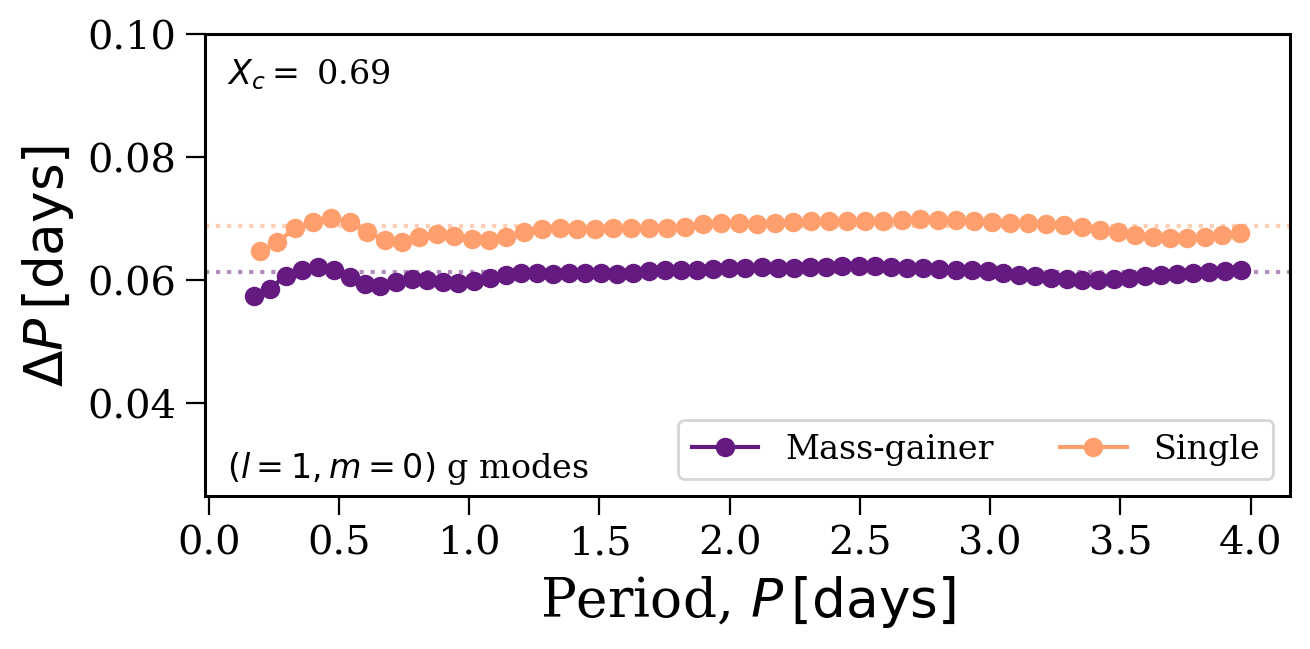

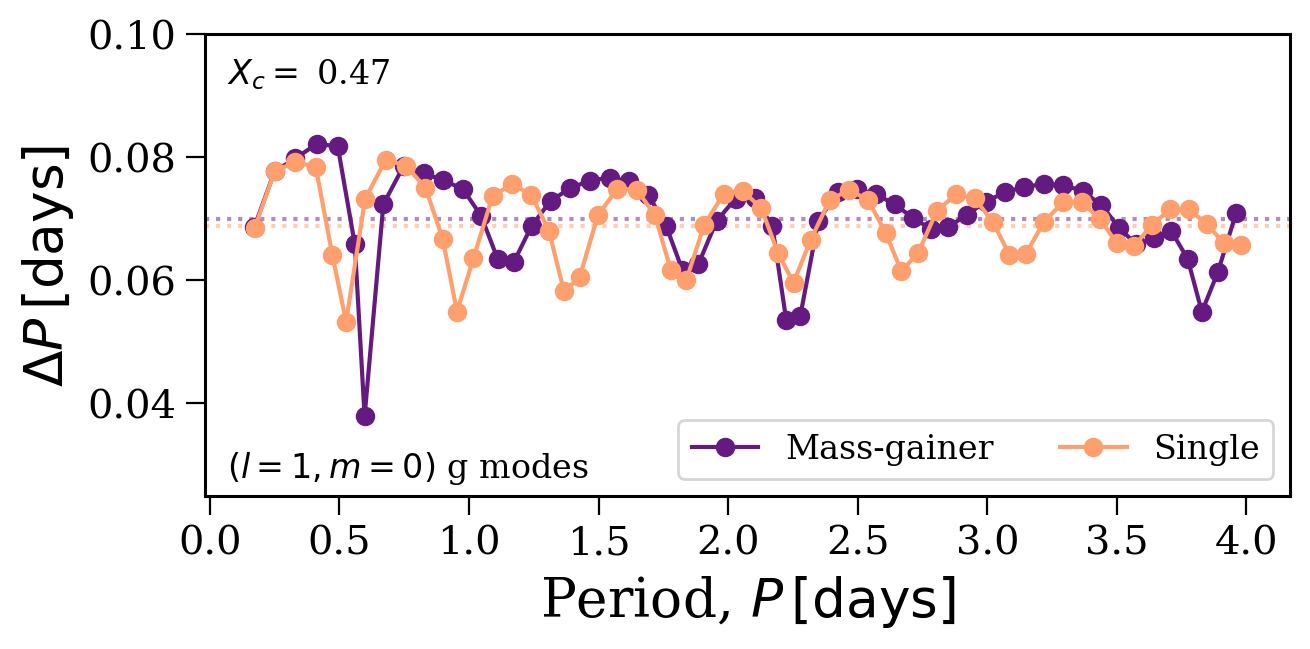

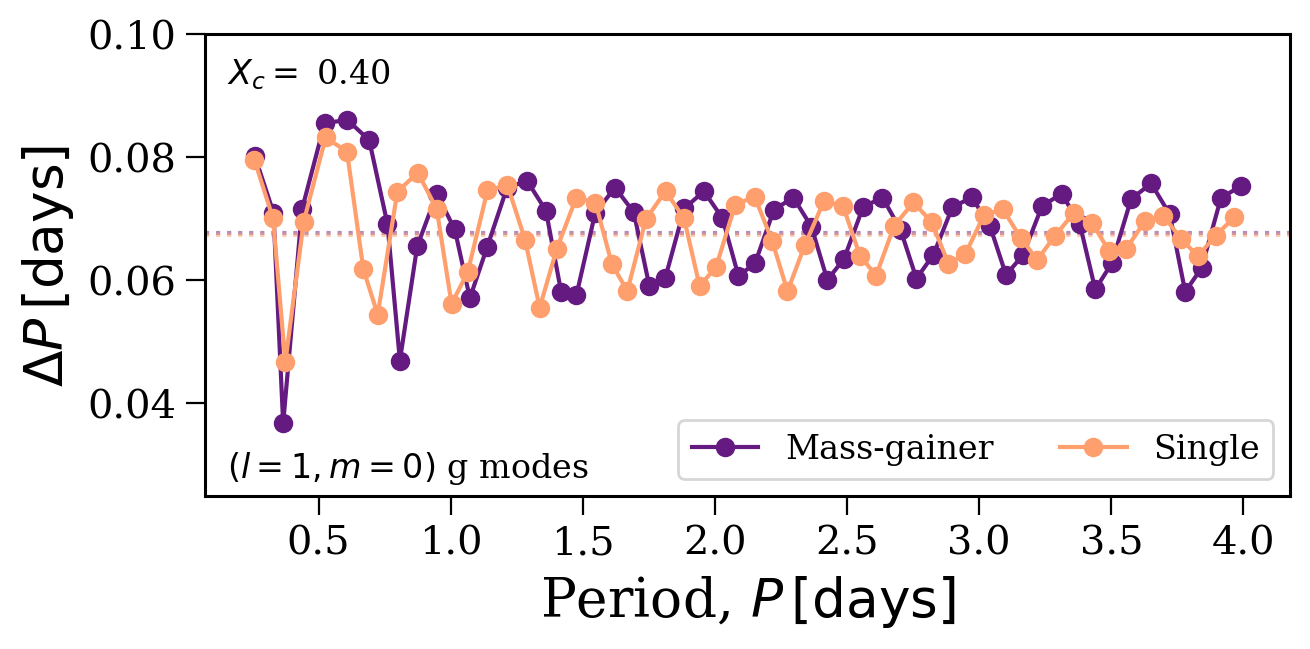

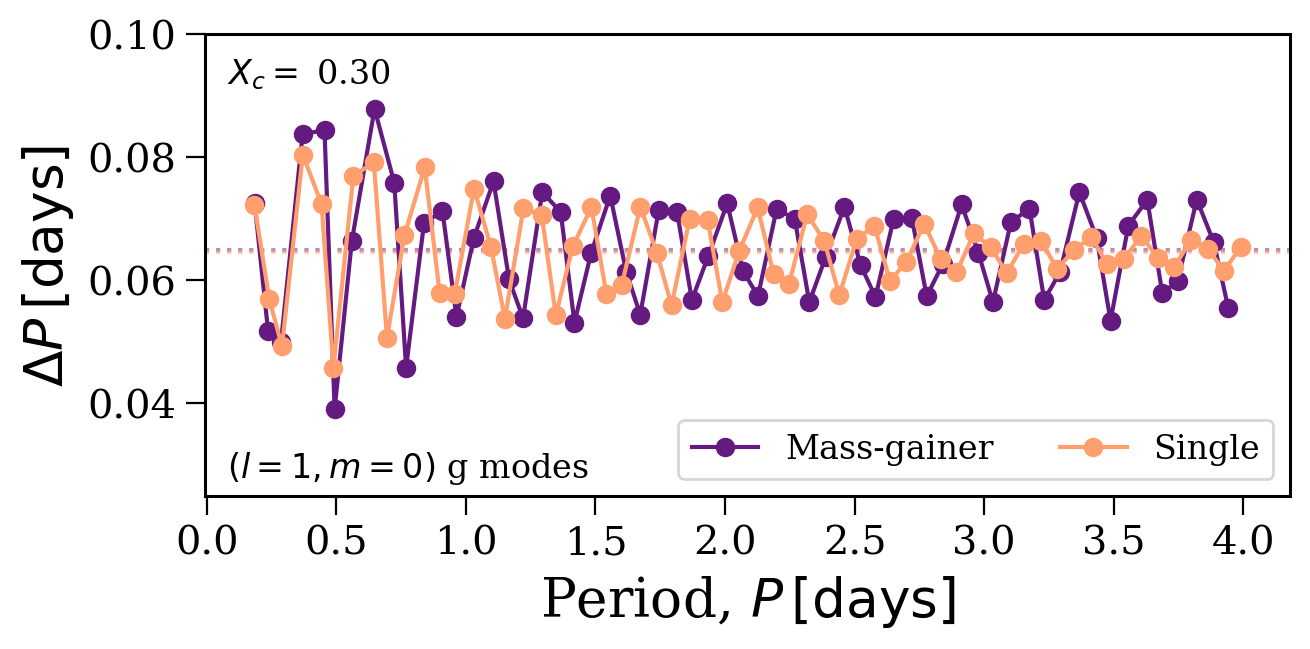

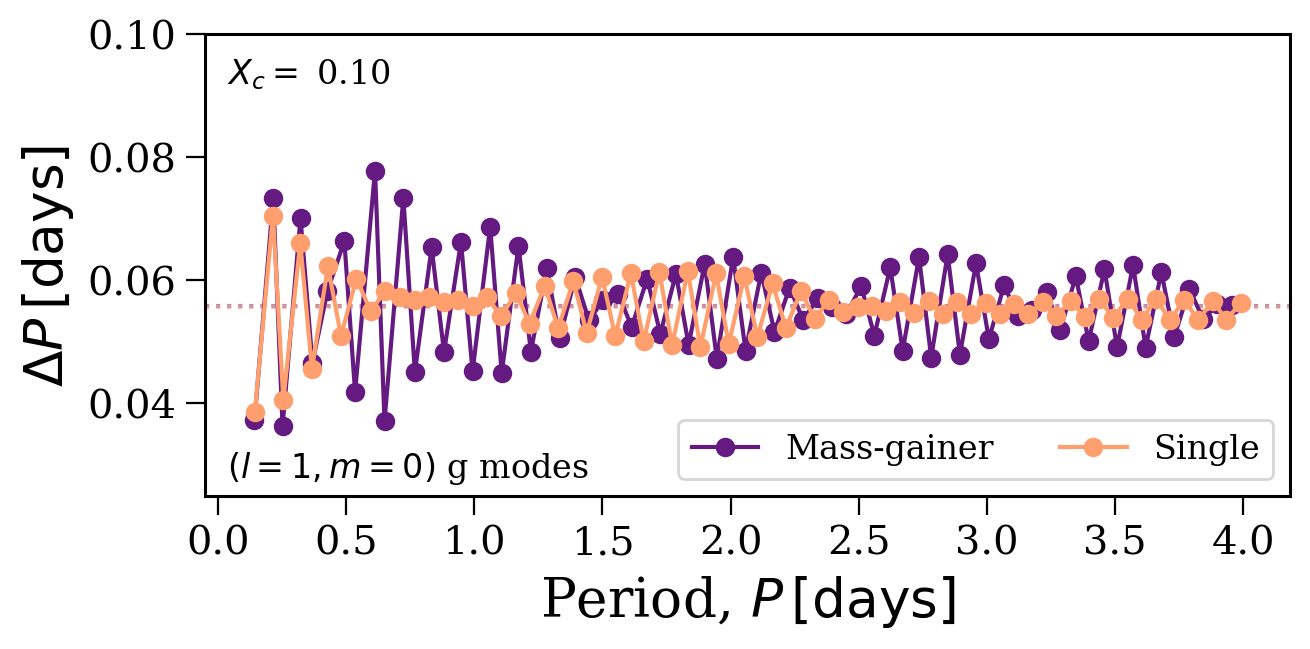

In [17]:
for X_c in [0.69, 0.47, 0.4, 0.3, 0.1]:
    fig, ax = plt.subplots(figsize=(7, 3))
    mpt.plot_period_spacing(X_c=X_c, tracks=[tracks["D_20"][1], single_tracks_mdm20["M_3.5"]],
                            legend_loc="lower right", label_modes=False, fig=fig, ax=ax, show=False, divide_delta_n=False, ylims="auto")
    ax.set_ylim(0.025, 0.1)
    plt.savefig(f"presentation_plots/period_spacing_Xc_{X_c}.png", format="png", bbox_inches="tight", dpi=300)
    plt.show()
    
# for ax in axes:
#     ax.grid(axis='x', linestyle="dotted", color="lightgrey")
#     ax.get_legend().remove()
#     if ax != axes[-1]:
#         ax.set_xlabel("")
#     if ax == axes[2]:
#         ax.set_ylabel(r"Period Spacing, $\Delta P \, [\rm days]$", fontsize=fs)
#     else:
#         ax.set_ylabel("")

# fig.legend(*ax.get_legend_handles_labels(), ncol=2, loc="upper center", bbox_to_anchor=(0.5, 1, 0, 0))

# fig.subplots_adjust(hspace=0.0, top=0.96)

# plt.savefig("figures/period_spacing_mdm20.pdf", format="pdf", bbox_inches="tight")

plt.show()